WESTERN GOVERNOR'S UNIVERSITY 
COLLEGE OF IT
D-208 PREDICTIVE MODELING 
TASK 1: MULTIPLE REGRESSION FOR PREDICTIVE MODELING

BY PAOLA WILLIAMS

Table of Contents

A1. Research Question

A2. Objectives and goals

B1. Summary of Statistics

B2. Tool benefits

B3. Appropriate technique

C1. Data goals

C2. Summary Statistics

C3. Steps to prepare the data

C4. Visualizations

C5. Prepared data set

D1. Initial Model

D2. Justification of model reduction

D3. Reduced multiple regression model

E1. Model Comparison

E2. Output and calculations

E3. Code

F1. Results

F2. Recommendations

G. Panopto demonstration

H. Sources of third-party code

I. Sources

A1. Reasearch Question

Predict the MonthlyCharge of customers

A2. Objectives and goals

-Clean and prepare data 

-Perform univariate and bivariate analysis on the dataset

-Run an initial multiple regression model

-Reduce the regression model

-Predict customers MonthlyCharge

-Analyse the accuracy of the model based on corresponding metrics 

B1. Summary of assumptions

The folllowing are the assumptions for a multiple linear regression model (Fein, Gilmour, Machin, Hendry, 2022  )

1. The dependent variable has to be a continuous variable.

2. There are two or more independent variables and they can be either continuous or categorical type.

3. The predictor variables should have a linear relationship.

4. The data should have homoscedasticity. In other words, the line of best fit is not dissimilar as the data points move across the line in a positive or negative direction. Homoscedasticity can be checked by producing standardised residual plots against the unstandardized predicted values.

5. Multicollinearity between the independent variables must not be present. 

6. There should be no extreme outliers.

7. The residuals (errors) should be approximately normally distributed


B2. Tool benefits

Python is the programming language used to create the logistic model for our dataset as we can:

-	Easily clean the data by removing nulls, outliers and dropping columns that are not relevant for this study
-	Apply the OLS function to run the multiple linear regression model
-	Calculate the slope and coefficients of our model
-	Split the data for training and testing
-	Identify collinearity between predicting variables
-	Create residual plots to check accuracy of the model
-	Obtain customers' prediction on MonthlyCharge

B3. Appropriate technique

We will use multiple linear regresison for this study since the MonthlyCharge, i.e, the response variables is continuous. 

C1. Data goals

-	Detect presence of nulls and outliers
-	Treat the nulls and outliers dependending on the variable distribution they belong to
-	Convert categorical variables into dummy variables 
-	Normalize numerical variables

C2. Summary Statistics

In this study, the response variable is MonthlyCharge. We will use the most relevant predictor variables and remove those that are not significant to predicting customers' churning. The independent variables chosen are:
'Population','State', 'Area','Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn','Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure','Techie','Contract', 'Port_modem', 'Tablet', 'InternetService','Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'PaymentMethod', 'Tenure','Bandwidth_GB_Year'.

In [2]:
# %pip install --upgrade pip
# %pip install mlxtend

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from itertools import product
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [4]:
df = pd.read_csv(r"C:\Users\paowm\Downloads\d9rkejv84kd9rk30fi2l\churn_clean.csv")

In [5]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [6]:
df = df[['Population','State', 'Area','Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year']]

We can see below the summary statistics of the numerical variables in the dataset. 

In [7]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


The variable Population has a mean of 9757 with a standard deviation of 14432. The maximum population is around 111K.
The variable Children has a mean of 2.08 and a standard deviation of 2.14. Also the maximum children customers have are 10 while the minimum is 349.
The variable Age has a mean of 53 and a standard deviation of 20. The maximum age is 89 while the minimum is 18.
The average Income is 39806 and the standard deviation is 28200. The maximum Income is $258K and the minimum is $348.
The Outage_sec_perweek has a mean of 10 and a standard deviation of 3. The maximum outage is 21 while the minimum is less than 0
In the case of Email, the mean is 12 emails and the standard deviation is 3. The maximum is 23 emails and the minimum is 0.
The variable Contacts has a mean of 1 and a standard deviation of 1. The maximum is 7 and the minimum is 0.
In the case of Yearly_equip_failure, the average is 0.4 and the standard deviation is 0.6. The maximum is 6 and the minimum is 0.
The variable Tenure has a mean of 34.5 and a standard deviation of 26.4. The maximum is 72 months and the minimum is 1.
For MonthlyCharge, the average is 173 and the standard deviation is 43. The maximum is 290 and the minimum is 80.
In the case of Bandwidth, the average is 3392 and the standard deviation is 2185. The maximum is 7159 and the minimum is 155.

C3. Steps to prepare data

1. Data cleaning: Nulls

In [8]:
df.isnull().sum()

Population              0
State                   0
Area                    0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

2. Data cleaning: Detecting and Treating Outliers

In [9]:
df['Z_Score_Children']=stats.zscore(df['Children'])
sum(df.Z_Score_Children > 3)


191

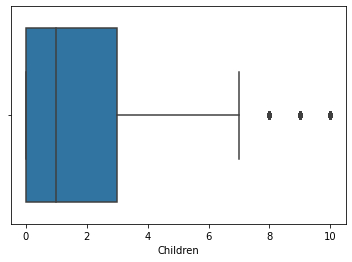

In [10]:
c =sns.boxplot(x='Children', data=df)

In [11]:
df['Children'] = np.where(df['Z_Score_Children'] > 3, df['Children'].median(), df['Children'])
df['Z_Score_Children']=stats.zscore(df['Children'])

In [12]:
df['Z_Score_Age']=stats.zscore(df['Age'])
sum((df.Z_Score_Age < -3) | (df.Z_Score_Age > 3))

0

In [13]:
df['Z_Score_Income']=stats.zscore(df['Income'])
sum((df.Z_Score_Income < -3) | (df.Z_Score_Income > 3))

145

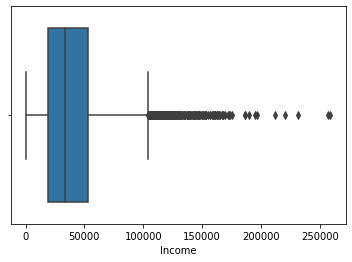

In [14]:
c =sns.boxplot(x='Income', data=df)

In [15]:
df['Income'] = np.where(df['Z_Score_Income'] > 3, df['Income'].median(), df['Income'])
df['Z_Score_Income']=stats.zscore(df['Income'])

In [16]:
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])
sum((df.Z_Score_Outage_sec_perweek< -3) | (df.Z_Score_Outage_sec_perweek > 3))

28

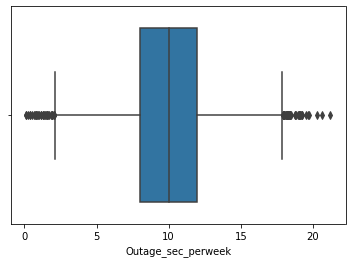

In [17]:
c =sns.boxplot(x='Outage_sec_perweek', data=df)

In [18]:
sum(df.Z_Score_Outage_sec_perweek > 3)

15

In [19]:
df['Outage_sec_perweek'] = np.where(df['Z_Score_Outage_sec_perweek'] > 3, df['Outage_sec_perweek'].median(), df['Outage_sec_perweek'])
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])

In [20]:
sum(df.Z_Score_Outage_sec_perweek < -3)

13

In [21]:
df['Outage_sec_perweek'] = np.where(df['Z_Score_Outage_sec_perweek'] < -3, df['Outage_sec_perweek'].median(), df['Outage_sec_perweek'])
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])

In [22]:
df['Z_Score_Email']=stats.zscore(df['Email'])
sum((df.Z_Score_Email < -3) | (df.Z_Score_Email > 3))

12

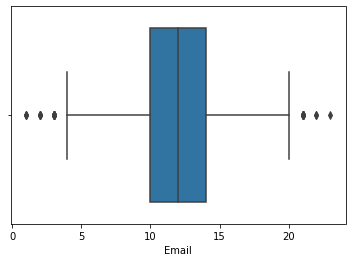

In [23]:
c =sns.boxplot(x='Email', data=df)

In [24]:
sum(df.Z_Score_Email < -3)

9

In [25]:
df['Email'] = np.where(df['Z_Score_Email'] < -3, df['Email'].median(), df['Email'])
df['Z_Score_Email']=stats.zscore(df['Email'])

In [26]:
sum(df.Z_Score_Email > 3)

3

In [27]:
df['Email'] = np.where(df['Z_Score_Email'] > 3, df['Email'].median(), df['Email'])
df['Z_Score_Email']=stats.zscore(df['Email'])

In [28]:
df['Z_Score_Contacts']=stats.zscore(df['Contacts'])
sum(df.Z_Score_Contacts > 3)

165

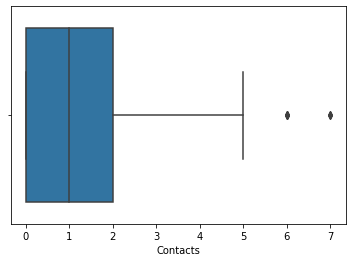

In [29]:
c =sns.boxplot(x='Contacts', data=df)

In [30]:
df['Contacts'] = np.where(df['Z_Score_Contacts'] > 3, df['Contacts'].median(), df['Contacts'])
df['Z_Score_Contacts']=stats.zscore(df['Contacts'])

In [31]:
df['Z_Score_Yearly_equip_failure']=stats.zscore(df['Yearly_equip_failure'])
sum((df.Z_Score_Yearly_equip_failure < -3) | (df.Z_Score_Yearly_equip_failure > 3))

94

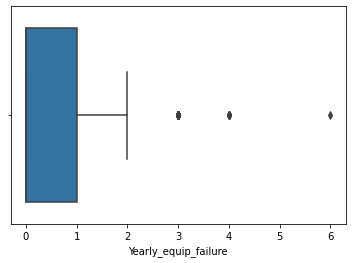

In [32]:
c =sns.boxplot(x='Yearly_equip_failure', data=df)

In [33]:
df['Yearly_equip_failure'] = np.where(df['Z_Score_Yearly_equip_failure'] > 3, df['Yearly_equip_failure'].median(), df['Yearly_equip_failure'])
df['Z_Score_Yearly_equip_failure']=stats.zscore(df['Yearly_equip_failure'])

In [34]:
df['Z_Score_Tenure']=stats.zscore(df['Tenure'])
sum((df.Z_Score_Tenure < -3) | (df.Z_Score_Tenure > 3))

0

In [35]:
df['Z_Score_Monthly_Charge']=stats.zscore(df['MonthlyCharge'])
sum((df.Z_Score_Monthly_Charge < -3) | (df.Z_Score_Monthly_Charge> 3))

0

In [36]:
df['Z_Score_Bandwidth_GB_Year']=stats.zscore(df['Bandwidth_GB_Year'])
sum((df.Z_Score_Bandwidth_GB_Year< -3) | (df.Z_Score_Bandwidth_GB_Year> 3))

0

In [37]:
df['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [38]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df['Churn'].value_counts()

0    7350
1    2650
Name: Churn, dtype: int64

In [39]:
df.describe()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,...,Z_Score_Children,Z_Score_Age,Z_Score_Income,Z_Score_Outage_sec_perweek,Z_Score_Email,Z_Score_Contacts,Z_Score_Yearly_equip_failure,Z_Score_Tenure,Z_Score_Monthly_Charge,Z_Score_Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,9756.562400,1.925000,53.078400,38151.157582,0.265000,9.999841,12.022200,0.940800,0.368800,34.526188,...,-1.634248e-17,-9.556800e-17,1.499245e-16,2.648548e-16,5.542233e-17,6.288303e-17,-5.258016e-17,2.273737e-17,-2.529532e-16,9.094947e-17
std,14432.698671,1.883383,20.698882,24850.801431,0.441355,2.933317,3.004565,0.891614,0.578464,26.443063,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,0.000000,0.000000,18.000000,348.670000,0.000000,1.144796,3.000000,0.000000,0.000000,1.000259,...,-1.022148e+00,-1.694785e+00,-1.521254e+00,-3.018934e+00,-3.002981e+00,-1.055218e+00,-6.375829e-01,-1.267917e+00,-2.157520e+00,-1.481263e+00
25%,738.000000,0.000000,35.000000,19224.717500,0.000000,8.033911,10.000000,0.000000,0.000000,7.917694,...,-1.022148e+00,-8.734435e-01,-7.616409e-01,-6.702407e-01,-6.730762e-01,-1.055218e+00,-6.375829e-01,-1.006306e+00,-7.602435e-01,-9.865847e-01
50%,2910.500000,1.000000,53.000000,33169.742500,0.000000,10.018270,12.000000,1.000000,0.000000,35.430507,...,-4.911622e-01,-3.787834e-03,-2.004629e-01,6.282993e-03,-7.389127e-03,6.639979e-02,-6.375829e-01,3.420043e-02,-1.197020e-01,-5.162246e-02
75%,13168.000000,3.000000,71.000000,51669.637500,1.000000,11.955480,14.000000,1.000000,1.000000,61.479795,...,5.708101e-01,8.658679e-01,5.440129e-01,6.667323e-01,6.582980e-01,6.639979e-02,1.091221e+00,1.019358e+00,6.546178e-01,1.003942e+00
max,111850.000000,8.000000,89.000000,124025.100000,1.000000,18.851730,21.000000,3.000000,2.000000,71.999280,...,3.225741e+00,1.735524e+00,3.455753e+00,3.017858e+00,2.988203e+00,2.309636e+00,2.820025e+00,1.417195e+00,2.737145e+00,1.723716e+00


In [40]:
df.to_csv(r'C:\Users\paowm\Desktop\churn_clean.csv')

C4. Visualizations

Univariate visualizations

Discrete variables

<AxesSubplot:xlabel='Children'>

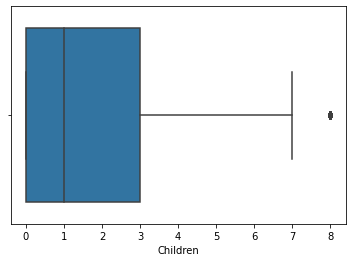

In [41]:
sns.boxplot(x=df["Children"])

<AxesSubplot:xlabel='Age'>

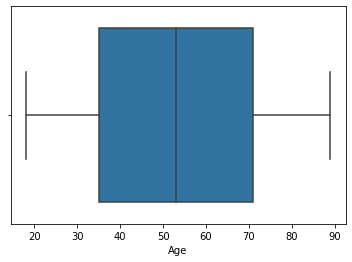

In [42]:
sns.boxplot(x=df["Age"])

<AxesSubplot:xlabel='Income'>

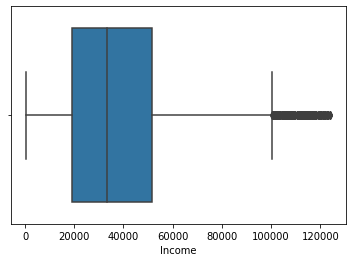

In [43]:
sns.boxplot(x=df["Income"])

<AxesSubplot:xlabel='Outage_sec_perweek'>

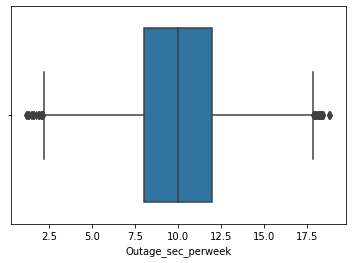

In [44]:
sns.boxplot(x=df["Outage_sec_perweek"])

<AxesSubplot:xlabel='Email'>

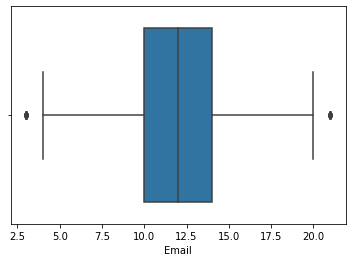

In [45]:
sns.boxplot(x=df["Email"])

<AxesSubplot:xlabel='Contacts'>

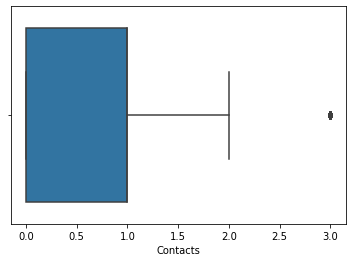

In [46]:
sns.boxplot(x=df["Contacts"])

<AxesSubplot:xlabel='Yearly_equip_failure'>

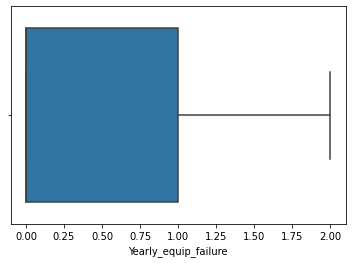

In [47]:
sns.boxplot(x=df["Yearly_equip_failure"])

<AxesSubplot:xlabel='Tenure'>

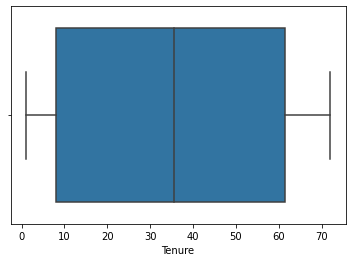

In [48]:
sns.boxplot(x=df["Tenure"])

<AxesSubplot:xlabel='MonthlyCharge'>

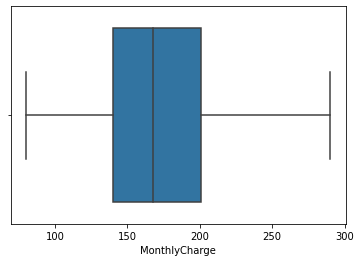

In [49]:
sns.boxplot(x=df["MonthlyCharge"])

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

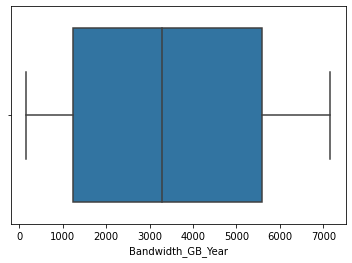

In [50]:
sns.boxplot(x=df["Bandwidth_GB_Year"])

### Categorical variables

<AxesSubplot:xlabel='Marital', ylabel='Count'>

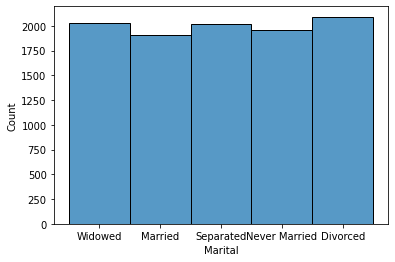

In [51]:
sns.histplot(data=df, x="Marital")

<AxesSubplot:xlabel='Gender', ylabel='Count'>

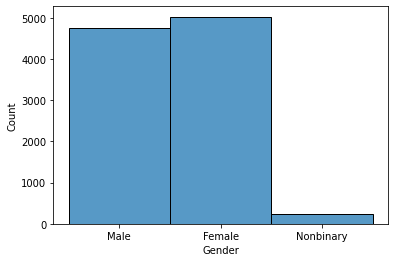

In [52]:
sns.histplot(data=df, x="Gender")

<AxesSubplot:xlabel='Techie', ylabel='Count'>

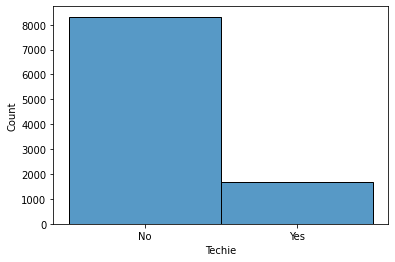

In [53]:
sns.histplot(data=df, x="Techie")

<AxesSubplot:xlabel='Contract', ylabel='Count'>

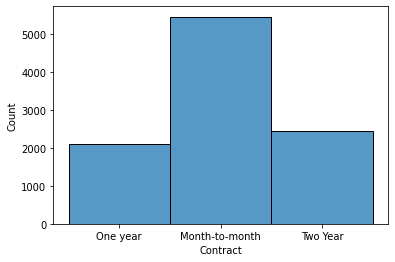

In [54]:
sns.histplot(data=df, x="Contract")

<AxesSubplot:xlabel='Port_modem', ylabel='Count'>

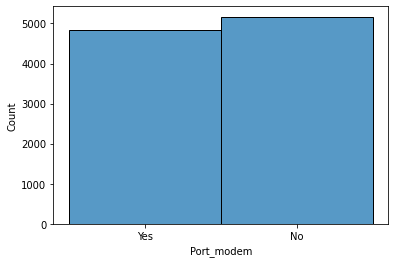

In [55]:
sns.histplot(data=df, x="Port_modem")

<AxesSubplot:xlabel='Tablet', ylabel='Count'>

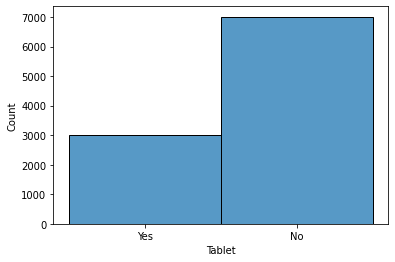

In [56]:
sns.histplot(data=df, x="Tablet")

<AxesSubplot:xlabel='Phone', ylabel='Count'>

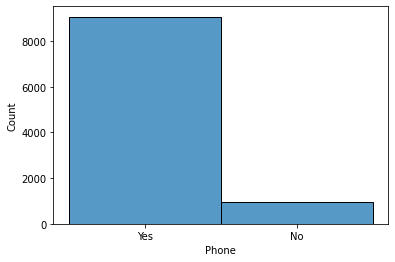

In [57]:
sns.histplot(data=df, x="Phone")

<AxesSubplot:xlabel='Multiple', ylabel='Count'>

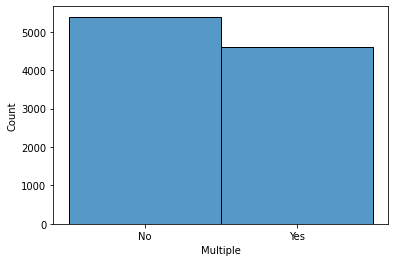

In [58]:
sns.histplot(data=df, x="Multiple")

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Count'>

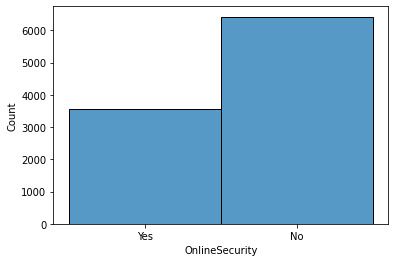

In [59]:
sns.histplot(data=df, x="OnlineSecurity")

<AxesSubplot:xlabel='OnlineBackup', ylabel='Count'>

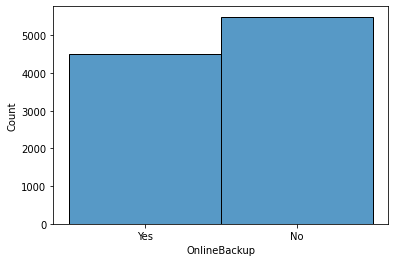

In [60]:
sns.histplot(data=df, x="OnlineBackup")

<AxesSubplot:xlabel='DeviceProtection', ylabel='Count'>

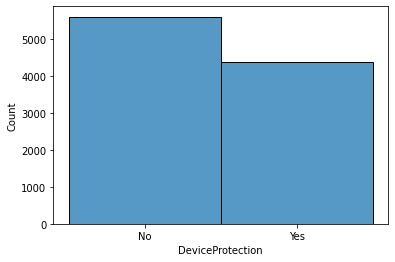

In [61]:
sns.histplot(data=df, x="DeviceProtection")

<AxesSubplot:xlabel='TechSupport', ylabel='Count'>

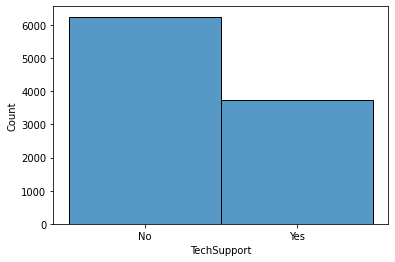

In [62]:
sns.histplot(data=df, x="TechSupport")

<AxesSubplot:xlabel='StreamingTV', ylabel='Count'>

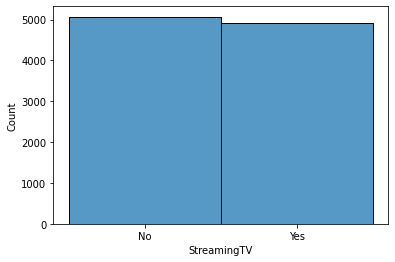

In [63]:
sns.histplot(data=df, x="StreamingTV")

<AxesSubplot:xlabel='StreamingMovies', ylabel='Count'>

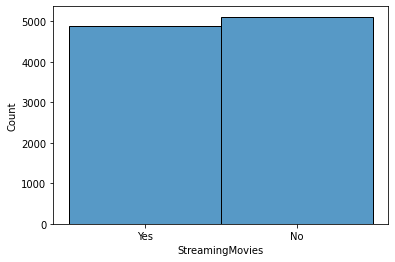

In [64]:
sns.histplot(data=df, x="StreamingMovies")

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Count'>

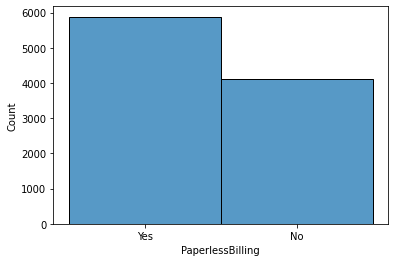

In [65]:
sns.histplot(data=df, x="PaperlessBilling")

<AxesSubplot:xlabel='PaymentMethod', ylabel='Count'>

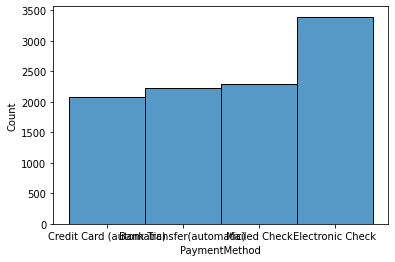

In [66]:
sns.histplot(data=df, x="PaymentMethod")

Bivariate visualizations

Numerical variables

We will create a correlation heat map to compare the numerial variables. These are discrete which would be considered as categorical in order to plot them.

<AxesSubplot:>

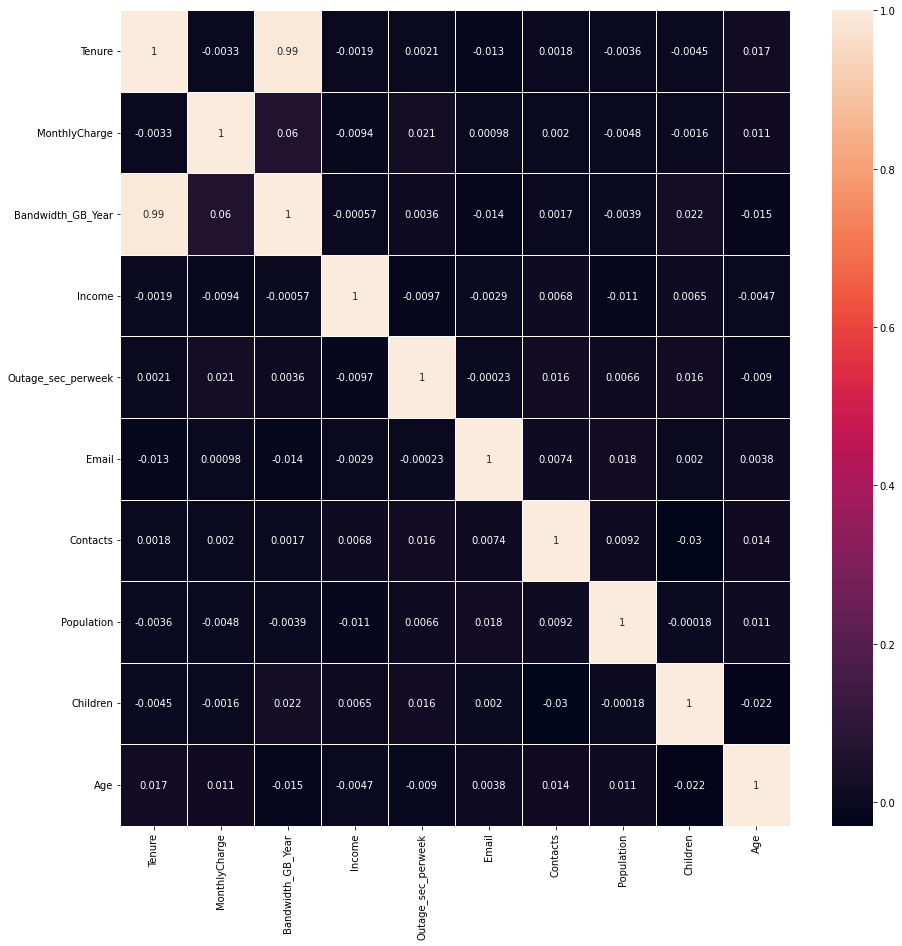

In [67]:
plt.subplots(figsize=(15,15))
df_num = df[['Tenure','MonthlyCharge','Bandwidth_GB_Year','Income','Outage_sec_perweek',
           'Email','Contacts','Population','Children','Age']]
sns.heatmap(df_num.corr(),annot=True,lw=1)

Categorical variables

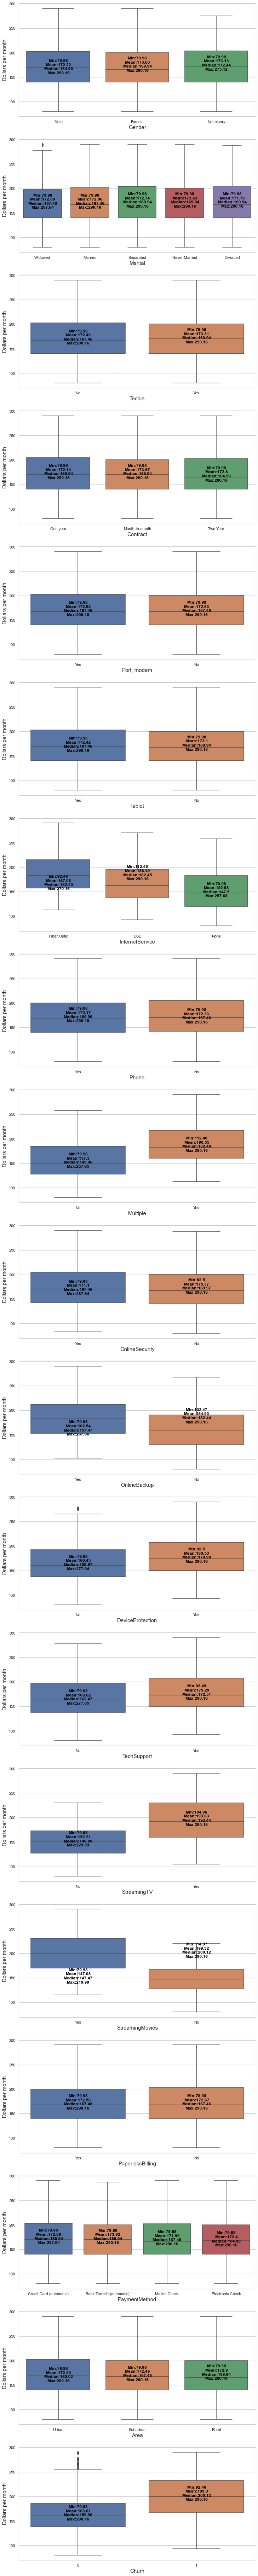

In [68]:
plot = ['Gender','Marital','Techie','Contract','Port_modem','Tablet','InternetService','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Area', 'Churn']

# Creating box plots, with mean and median printed
sns.set(style="whitegrid")
fig, axes = plt.subplots(ncols=1, nrows = len(plot), figsize = (12,7*len(plot)))
i = 0
for x in plot:
    g = sns.boxplot(y='MonthlyCharge',x=x,data=df, ax=axes[i])
    g.set_xlabel(x,fontsize=15)
    g.set_ylabel("Dollars per month",fontsize=15)
    i += 1
    means = df.groupby(x)['MonthlyCharge'].mean()
    medians = df.groupby(x)['MonthlyCharge'].median()
    maxs = df.groupby(x)['MonthlyCharge'].max()
    mins = df.groupby(x)['MonthlyCharge'].min()
    vertical_offset = df['MonthlyCharge'].mean() *.05
    for xtick in g.get_xticks():
        mean_ = str(round(means[xtick],2))
        median_ = str(round(medians[xtick],2))
        max_ = str(round(maxs[xtick],2))
        min_ = str(round(mins[xtick],2))
        ypos = medians[xtick]-vertical_offset
        g.text(xtick,ypos,"Min:"+min_+'\nMean:'+mean_+
               "\nMedian:"+median_+"\nMax:"+max_, horizontalalignment='center', 
               color='black', weight='semibold')


plt.show(fig)

Convert categorical variables to dummy variables

In [69]:
df = df.drop(columns=['Z_Score_Children','Z_Score_Age','Z_Score_Income','Z_Score_Outage_sec_perweek','Z_Score_Email', 'Z_Score_Contacts', 'Z_Score_Yearly_equip_failure', 'Z_Score_Tenure','Z_Score_Monthly_Charge', 'Z_Score_Monthly_Charge','Z_Score_Bandwidth_GB_Year'])

In [70]:
df.dtypes

Population                int64
State                    object
Area                     object
Children                float64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                     int64
Outage_sec_perweek      float64
Email                   float64
Contacts                float64
Yearly_equip_failure    float64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
PaymentMethod            object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: o

C5. Prepared datast

In [71]:
df

,Population,State,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,AK,Urban,0.0,68,28561.99,Widowed,Male,0,7.978323,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,10446,MI,Urban,1.0,27,21704.77,Married,Female,1,11.699080,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,3735,OR,Urban,4.0,50,9609.57,Widowed,Female,0,10.752800,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,13863,CA,Suburban,1.0,48,18925.23,Married,Male,0,14.913540,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,11352,TX,Suburban,0.0,83,40074.19,Separated,Male,1,8.147417,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,VT,Rural,3.0,23,55723.74,Married,Male,0,9.415935,...,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601
9996,77168,TN,Rural,4.0,48,34129.34,Divorced,Male,0,6.740547,...,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810
9997,406,TX,Rural,1.0,48,45983.43,Never Married,Female,0,6.590911,...,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799
9998,35575,GA,Urban,1.0,39,16667.58,Separated,Male,0,12.071910,...,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752


A copy of the prepared dataset has been provided in the submission.

D1. Initial model

In [72]:
dummy_variables = ['State','Churn','Area','Marital','Gender','Techie','Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']

to_transform = ['Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']

index = 0

In [73]:
def get_dummy_data_with_output(dummy_variable_columns, df):
    global index
    dummy_data = pd.get_dummies(df, prefix=dummy_variable_columns, columns=dummy_variable_columns, drop_first= True)
    y = dummy_data['MonthlyCharge']
    dummy_data.drop(columns=['MonthlyCharge'], inplace=True)
    index += 1
    return y, dummy_data

y, dummy_data = get_dummy_data_with_output(dummy_variables, df)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(dummy_data,y,test_size=.3, random_state=0)

In [75]:
def get_sm_model(y_train,X_train, X_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    model=sm.OLS(y_train,X_train)
    model=model.fit()
    print(model.summary())
    y_hat = model.predict(X_test)
    arr = np.c_[y_hat, y_test]
    print('\nPrinting predicted and actual values:\n',arr)
    print('\nPrinting Mean Squared Error:\n',(np.sqrt(mean_squared_error(y_test, y_hat))))
    print('\nR2 Score:\n',r2_score(y_test, y_hat))
    fix, ax = plt.subplots(figsize=(15,5))
    g = sns.regplot(y=y_test,x=y_hat, ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Test",fontsize=15)
    plt.show()
    return model, arr

In [76]:
def get_sk_model(y_train,X_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(),model.coef_]
    intercept = model.intercept_
    print('\nPrinting model coefficients and intercept summary for sklearn model:\n',arr, model.intercept_)
    y_pred = model.predict(X_test)
    print('\nPrinting predicted and actual values from sklearn:\n',np.c_[y_pred, y_test])
    print('\nPrinting Mean Squared Error from sklearn:\n',(np.sqrt(mean_squared_error(y_test, y_pred))))
    print('\nR2 Score  from sklearn:\n',r2_score(y_test, y_pred))
    fix, ax = plt.subplots(figsize=(15,5))
    g = sns.regplot(y=y_test,x=y_pred,color="g", ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Test",fontsize=15)
    plt.show()

    fix, ax = plt.subplots(figsize=(15,5))
    g = sns.regplot(x=y_pred,y=y_test-y_pred,color="red", ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Residual",fontsize=15)
    plt.show()
    return model, arr, intercept

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2748.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:48:36   Log-Likelihood:                -23671.
No. Observations:                7000   AIC:                         4.752e+04
Df Residuals:                    6910   BIC:                         4.814e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

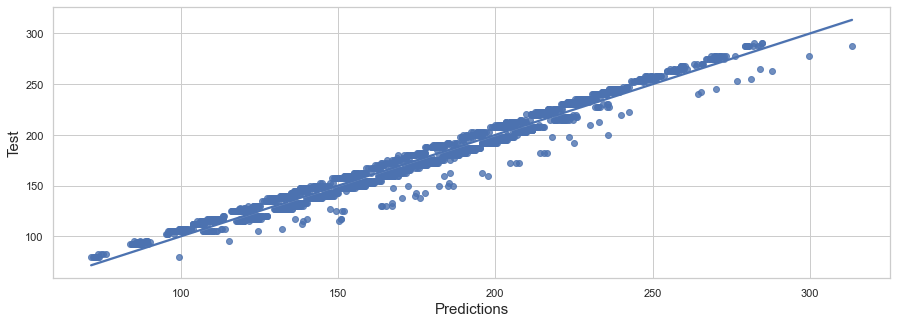


Printing model coefficients and intercept summary for sklearn model:
 [['Population' '1.9939100351556666e-06']
 ['Children' '-3.2908474559431897']
 ['Age' '0.37500153592225727']
 ['Income' '2.4661220947574947e-06']
 ['Outage_sec_perweek' '0.04790250237326532']
 ['Email' '0.03021241941613262']
 ['Contacts' '-0.0647061319619553']
 ['Yearly_equip_failure' '-0.019262136731386548']
 ['Tenure' '-9.109120172754066']
 ['Bandwidth_GB_Year' '0.11142028654094283']
 ['State_AL' '-1.685122553064648']
 ['State_AR' '-0.5631870159694388']
 ['State_AZ' '-0.6113257332271171']
 ['State_CA' '-0.09120676346286061']
 ['State_CO' '-1.0610172900179557']
 ['State_CT' '-0.43531566276684064']
 ['State_DC' '-7.766096806947546']
 ['State_DE' '1.8309152889512514']
 ['State_FL' '0.13933221543651264']
 ['State_GA' '-0.7888911826210361']
 ['State_HI' '-1.6176687346988912']
 ['State_IA' '-0.9354961417383372']
 ['State_ID' '-0.45759743404744313']
 ['State_IL' '-0.8739583328107123']
 ['State_IN' '-0.17555496174978735']


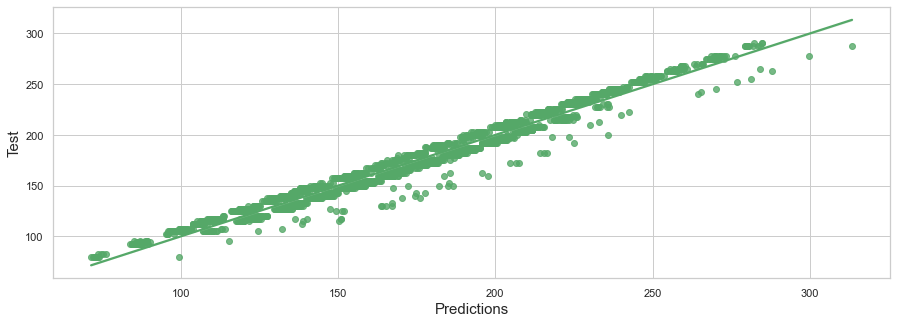

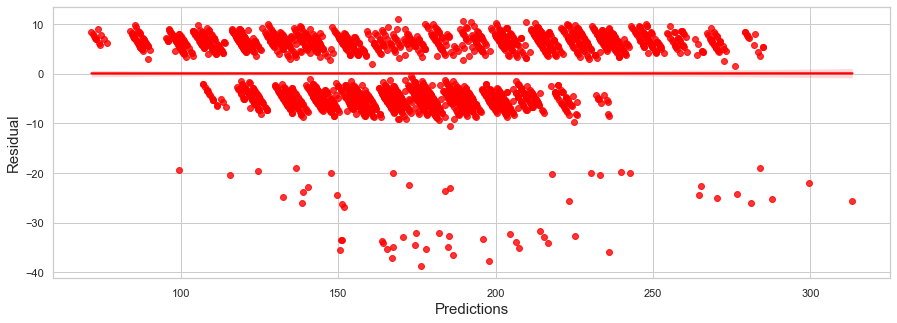

In [77]:
model_sm, arr_sm = get_sm_model(y_train,X_train, X_test)

model, arr, intercept = get_sk_model(y_train,X_train, X_test)

D2. Justification of model reduction

Since we have quite a few variables in the initial model we will reduce our dataset by removing those using the Variance Inflation Factor. This method is used to detect multicollinearity between variables by indicating that the reason behind an increase in variance is a result of collinearity (CFI, 2022).

When there is a linear relationship between variables, the regression coefficients are not reliable because the standard errors are
enlarged. After performing the VIF to the dataset, the variables will be reduced until there is no linear relationships among them which
means our model is reliable and the regression coefficients of the remaining variables are statistically significant.

The method states that when there is an VIF above is possible that there is an existing multicollinearity. When the VIF reaches 5 or
higher, multicollinearity exists and it has to be corrected. We will drop those variables that have VIF higher than 5 one by one to ensure
we are removing the correct ones since every time we drop one variable the VIF recalculates.

Later, we will use the backward elimination technique to remove the remaining variables that are not statistically significant. This method consists on the following steps:

1. Find the variable with the highest p-value

2. Remove that variable from the dataset

3. Run the regression model

4. Repeat process until all the variables with p-values hisher than 0.05 have been removed from the dataset.

For testing the accuracy of the model we will calculate the R squared for both the initial and reduced models.

D3. Reduced multiple regression model

The variable with the highest p-value is Area with 0.952. We will remove it from the dataset

In [78]:
df_v = df[['Churn','Marital','Gender','Techie','Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']]

In [79]:
X = df[['Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','Bandwidth_GB_Year']]

In [80]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
 for i in range(len(X.columns))]

print(vif_data)

                feature         VIF
0            Population    1.448178
1              Children    2.124704
2                   Age    6.466961
3                Income    3.187644
4    Outage_sec_perweek    9.633972
5                 Email   11.367806
6              Contacts    2.079697
7  Yearly_equip_failure    1.395050
8                Tenure  157.631392
9     Bandwidth_GB_Year  194.808103


In [81]:
X.drop(columns='Bandwidth_GB_Year', inplace= True, axis=1)


c:\Users\paowm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
 
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
 for i in range(len(X.columns))]
 
print(vif_data)

                feature        VIF
0            Population   1.446757
1              Children   1.997077
2                   Age   6.400639
3                Income   3.157637
4    Outage_sec_perweek   9.165691
5                 Email  10.566475
6              Contacts   2.071907
7  Yearly_equip_failure   1.393266
8                Tenure   2.596404


In [83]:
X.drop(columns='Email', inplace= True, axis=1)

c:\Users\paowm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
 
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
 for i in range(len(X.columns))]
 
print(vif_data)

                feature       VIF
0            Population  1.434544
1              Children  1.964005
2                   Age  5.654311
3                Income  3.039533
4    Outage_sec_perweek  7.051357
5              Contacts  2.039836
6  Yearly_equip_failure  1.387945
7                Tenure  2.542632


In [85]:
X.drop(columns='Outage_sec_perweek', inplace= True, axis=1)

c:\Users\paowm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [86]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
 
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
 for i in range(len(X.columns))]
 
print(vif_data)

                feature       VIF
0            Population  1.413238
1              Children  1.880010
2                   Age  4.207195
3                Income  2.810926
4              Contacts  1.962254
5  Yearly_equip_failure  1.369844
6                Tenure  2.409680


In [87]:
X.columns

Index(['Population', 'Children', 'Age', 'Income', 'Contacts',
       'Yearly_equip_failure', 'Tenure'],
      dtype='object')

We will now use the p-values from the initial model to eliminate those variables that are not statistically significant to the response variable. First, we will drop the State variable

In [88]:
df.drop('State', axis=1)

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,Urban,0.0,68,28561.99,Widowed,Male,0,7.978323,10.0,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,10446,Urban,1.0,27,21704.77,Married,Female,1,11.699080,12.0,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,3735,Urban,4.0,50,9609.57,Widowed,Female,0,10.752800,9.0,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,13863,Suburban,1.0,48,18925.23,Married,Male,0,14.913540,15.0,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,11352,Suburban,0.0,83,40074.19,Separated,Male,1,8.147417,16.0,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3.0,23,55723.74,Married,Male,0,9.415935,12.0,...,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601
9996,77168,Rural,4.0,48,34129.34,Divorced,Male,0,6.740547,15.0,...,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810
9997,406,Rural,1.0,48,45983.43,Never Married,Female,0,6.590911,10.0,...,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799
9998,35575,Urban,1.0,39,16667.58,Separated,Male,0,12.071910,14.0,...,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752


In [89]:
# df = ['Churn','Population', 'Children', 'Age', 'Income', 'Contacts',
#        'Yearly_equip_failure', 'Tenure', 'Marital','Gender','Techie',
#        'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
#        'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
#        'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','MonthlyCharge']
# df_reduced = df[['Churn','Population', 'Children', 'Age', 'Income', 'Contacts',
#        'Yearly_equip_failure', 'Tenure', 'Marital','Gender','Techie',
#        'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
#        'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
#        'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','MonthlyCharge']]
# dummy_variables = ['Marital','Gender','Techie',
#        'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
#        'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
#        'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Churn']

# to_transform = ['Population', 'Children', 'Age', 'Income', 'Contacts',
#        'Yearly_equip_failure','Tenure','MonthlyCharge']

# data_diff = [i for i in df_reduced.columns.tolist() + df_reduced.columns.tolist() if i not in df.columns.tolist() or i not in df_reduced.columns.tolist()]

# y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, df_reduced)
# X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)

# get_sm_model(y_train,X_train, X_test)

# model, arr, intercept = get_sk_model(y_train,X_train, X_test)

In [90]:
# dummy_variables = ['Churn','Marital','Gender','Techie','Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']

# to_transform = ['Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']

In [91]:
# X = ['Churn','Area','Marital','Gender','Techie','Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']
# y = ['MonthlyCharge']

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     4935.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:48:45   Log-Likelihood:                -25073.
No. Observations:                7000   AIC:                         5.021e+04
Df Residuals:                    6966   BIC:                         5.045e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

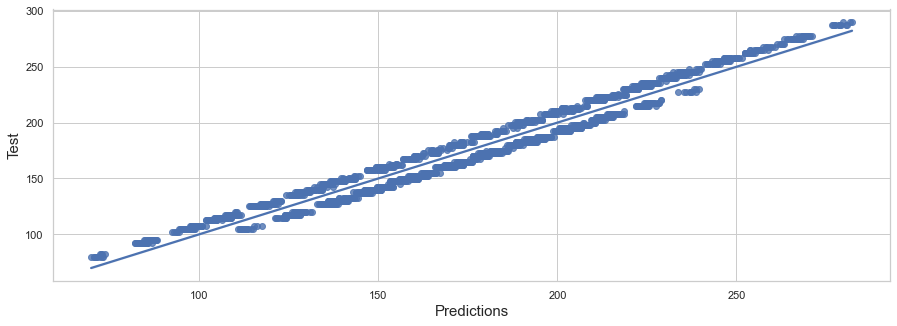


Printing model coefficients and intercept summary for sklearn model:
 [['Population' '4.19178519624308e-06']
 ['Children' '-0.008096494502705838']
 ['Age' '0.00761683449212953']
 ['Income' '5.307953693211324e-06']
 ['Contacts' '-0.06475173811714367']
 ['Yearly_equip_failure' '-0.08127995050972044']
 ['Tenure' '0.030477352958668644']
 ['Marital_Married' '0.3173579371176689']
 ['Marital_Never Married' '-0.10660811865523635']
 ['Marital_Separated' '-0.005925203786007347']
 ['Marital_Widowed' '0.08554771089720485']
 ['Gender_Male' '-0.22698372498656677']
 ['Gender_Nonbinary' '-0.9370973657050662']
 ['Techie_Yes' '-0.10238052901107955']
 ['Contract_One year' '0.8489410337749935']
 ['Contract_Two Year' '0.7094128000517552']
 ['Port_modem_Yes' '-0.3752565011096466']
 ['Tablet_Yes' '-0.34999742225861535']
 ['InternetService_Fiber Optic' '20.060474763186722']
 ['InternetService_None' '-12.834115201025632']
 ['Phone_Yes' '-0.38671765099330957']
 ['Multiple_Yes' '31.97046564736454']
 ['OnlineSec

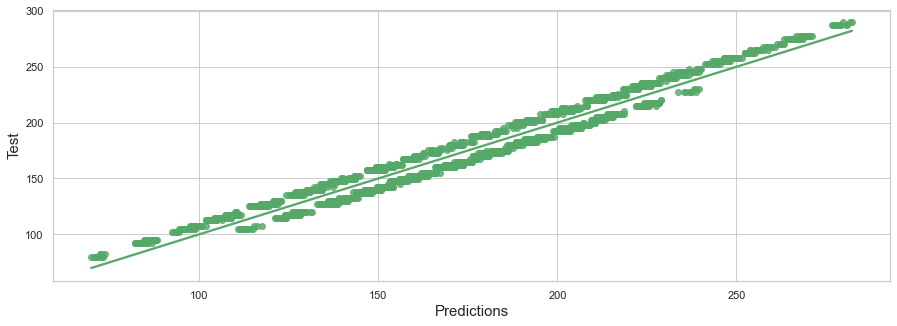

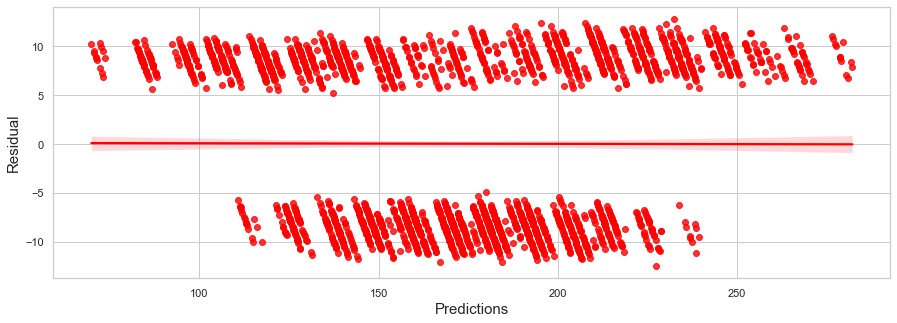

(10000, 7)

In [92]:
data_reduced = df[['Churn','Population', 'Children', 'Age', 'Income', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'Marital','Gender','Techie',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','MonthlyCharge']]

dummy_variables = ['Marital','Gender','Techie',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Churn']

to_transform = ['Population', 'Children', 'Age', 'Income', 'Contacts',
       'Yearly_equip_failure','Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Then, we will drop the variable Marital.

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     5617.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:48:50   Log-Likelihood:                -25074.
No. Observations:                7000   AIC:                         5.021e+04
Df Residuals:                    6970   BIC:                         5.041e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

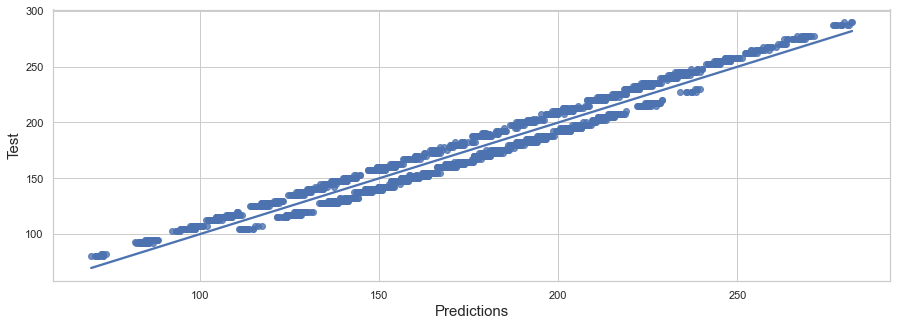


Printing model coefficients and intercept summary for sklearn model:
 [['Population' '4.145020096163284e-06']
 ['Children' '-0.0077714854847450235']
 ['Age' '0.007548491489437795']
 ['Income' '5.362057221446607e-06']
 ['Contacts' '-0.06409870892460871']
 ['Yearly_equip_failure' '-0.08186176081011513']
 ['Tenure' '0.030427574746227058']
 ['Gender_Male' '-0.22417572969205737']
 ['Gender_Nonbinary' '-0.9287067692611856']
 ['Techie_Yes' '-0.0919390474788231']
 ['Contract_One year' '0.8447125284581167']
 ['Contract_Two Year' '0.7026533539924829']
 ['Port_modem_Yes' '-0.3744974736704448']
 ['Tablet_Yes' '-0.3514504433059906']
 ['InternetService_Fiber Optic' '20.058705648127752']
 ['InternetService_None' '-12.833058087703648']
 ['Phone_Yes' '-0.37934033283403845']
 ['Multiple_Yes' '31.967722682826288']
 ['OnlineSecurity_Yes' '2.754078480353775']
 ['OnlineBackup_Yes' '22.57843249231207']
 ['DeviceProtection_Yes' '12.264517204832643']
 ['TechSupport_Yes' '12.666610631770046']
 ['StreamingTV_Ye

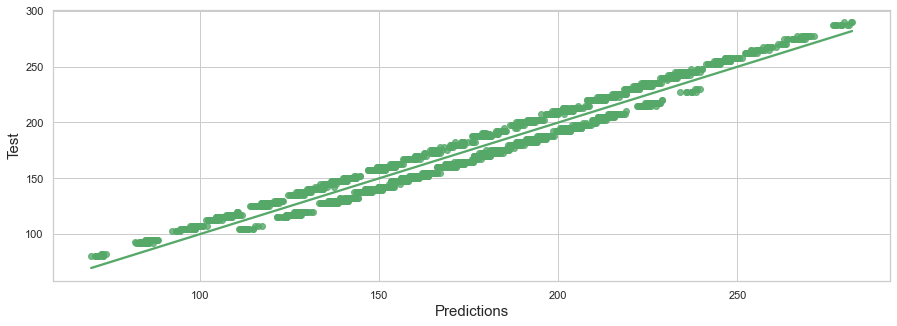

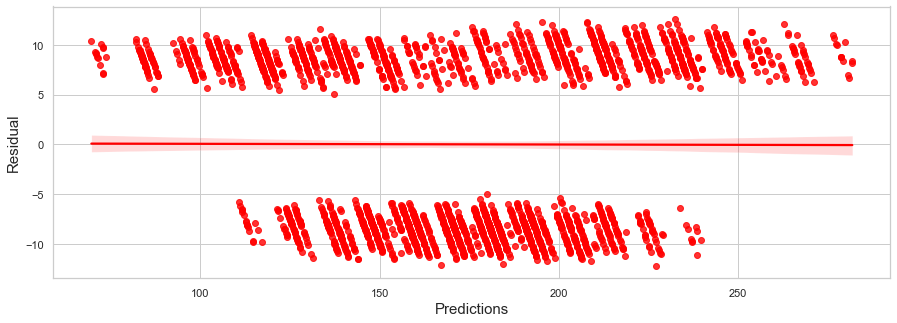

(10000, 7)

In [93]:
data_reduced = df[['Churn','Population', 'Children', 'Age', 'Income', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'Gender','Techie',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','MonthlyCharge']]

dummy_variables = ['Gender','Techie',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Churn']

to_transform = ['Population', 'Children', 'Age', 'Income', 'Contacts',
       'Yearly_equip_failure','Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Now, we will drop Payment Method since its p-value is 0.937

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     6267.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:48:54   Log-Likelihood:                -25075.
No. Observations:                7000   AIC:                         5.020e+04
Df Residuals:                    6973   BIC:                         5.039e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

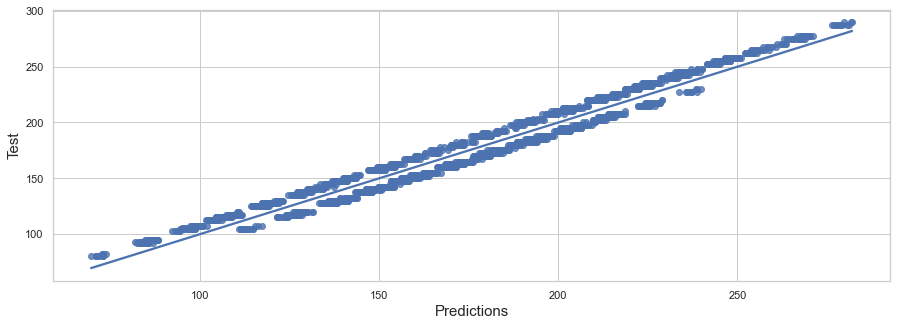


Printing model coefficients and intercept summary for sklearn model:
 [['Population' '4.129035342613769e-06']
 ['Children' '-0.00789783002641943']
 ['Age' '0.00757382781244202']
 ['Income' '5.3668989774776955e-06']
 ['Contacts' '-0.06321730062617573']
 ['Yearly_equip_failure' '-0.08396086506597694']
 ['Tenure' '0.03035224810166788']
 ['Gender_Male' '-0.2283892342064989']
 ['Gender_Nonbinary' '-0.9246566104501389']
 ['Techie_Yes' '-0.09612444682917194']
 ['Contract_One year' '0.8469808315678107']
 ['Contract_Two Year' '0.6994665552934108']
 ['Port_modem_Yes' '-0.37127309085883664']
 ['Tablet_Yes' '-0.3554488426752864']
 ['InternetService_Fiber Optic' '20.053278826406917']
 ['InternetService_None' '-12.838775349895691']
 ['Phone_Yes' '-0.3811250380513258']
 ['Multiple_Yes' '31.967754031956485']
 ['OnlineSecurity_Yes' '2.752449022965015']
 ['OnlineBackup_Yes' '22.577382698666383']
 ['DeviceProtection_Yes' '12.264757997215828']
 ['TechSupport_Yes' '12.666948399046861']
 ['StreamingTV_Yes'

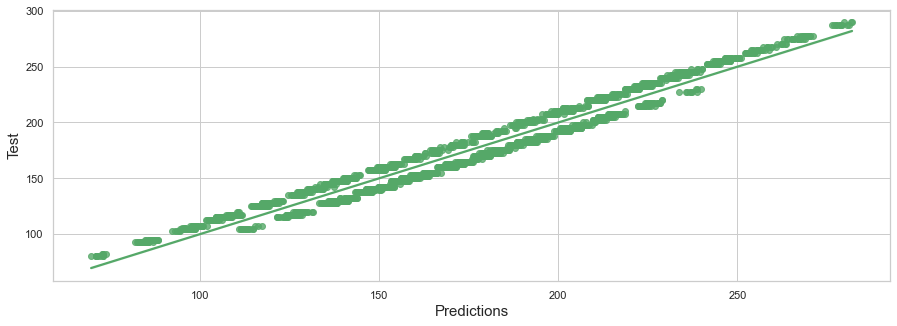

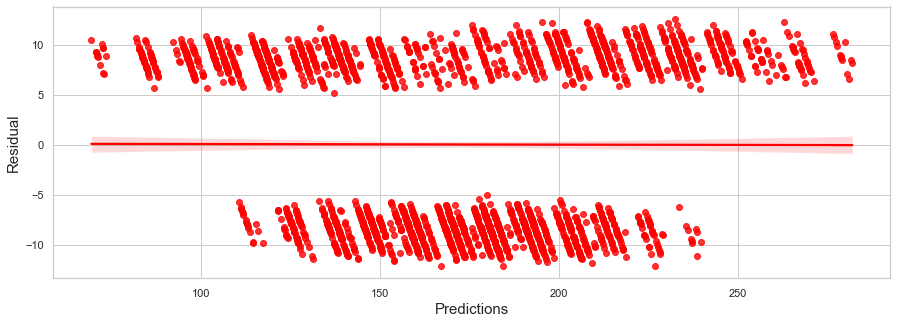

(10000, 7)

In [94]:
data_reduced = df[['Churn','Population', 'Children', 'Age', 'Income', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'Gender','Techie',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharge']]

dummy_variables = ['Gender','Techie',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

to_transform = ['Population', 'Children', 'Age', 'Income', 'Contacts',
       'Yearly_equip_failure','Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Then, we will drop Children from the dataset.

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     6519.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:48:59   Log-Likelihood:                -25075.
No. Observations:                7000   AIC:                         5.020e+04
Df Residuals:                    6974   BIC:                         5.038e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

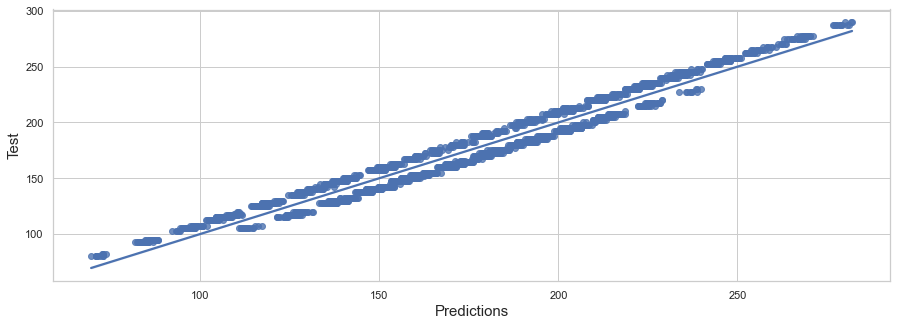


Printing model coefficients and intercept summary for sklearn model:
 [['Population' '4.126680768813063e-06']
 ['Age' '0.0075832016652759154']
 ['Income' '5.3645643807038245e-06']
 ['Contacts' '-0.06253002135247511']
 ['Yearly_equip_failure' '-0.08417698845808357']
 ['Tenure' '0.030360208759750467']
 ['Gender_Male' '-0.22825479668990928']
 ['Gender_Nonbinary' '-0.9254848828452245']
 ['Techie_Yes' '-0.09634929472807803']
 ['Contract_One year' '0.8468893522284754']
 ['Contract_Two Year' '0.6987164480874888']
 ['Port_modem_Yes' '-0.37173038952904514']
 ['Tablet_Yes' '-0.35509499768137553']
 ['InternetService_Fiber Optic' '20.053718336362145']
 ['InternetService_None' '-12.838924019843498']
 ['Phone_Yes' '-0.38041647377946']
 ['Multiple_Yes' '31.968240231128146']
 ['OnlineSecurity_Yes' '2.752027179096412']
 ['OnlineBackup_Yes' '22.577471600124362']
 ['DeviceProtection_Yes' '12.264482405895071']
 ['TechSupport_Yes' '12.667011152418754']
 ['StreamingTV_Yes' '41.41490445186985']
 ['Streaming

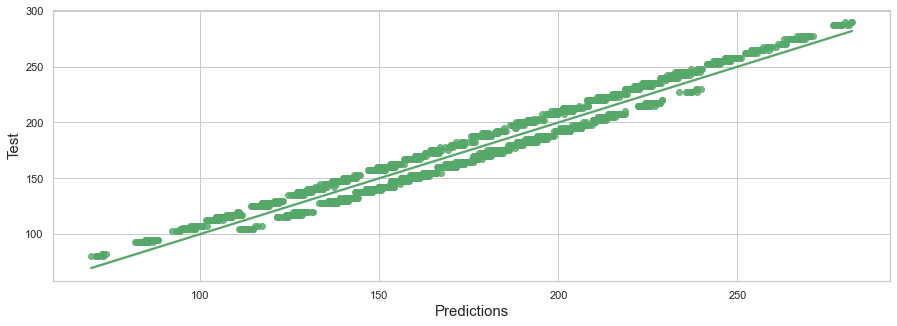

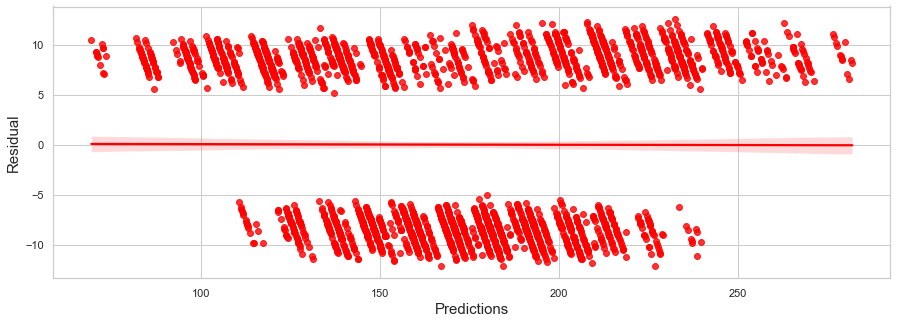

(10000, 7)

In [95]:
data_reduced = df[['Churn','Population', 'Age', 'Income', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'Gender','Techie',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharge']]

dummy_variables = ['Gender','Techie',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

to_transform = ['Population', 'Age', 'Income', 'Contacts',
       'Yearly_equip_failure','Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Next, the variable Techie will be removed.

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     6791.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:04   Log-Likelihood:                -25075.
No. Observations:                7000   AIC:                         5.020e+04
Df Residuals:                    6975   BIC:                         5.037e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

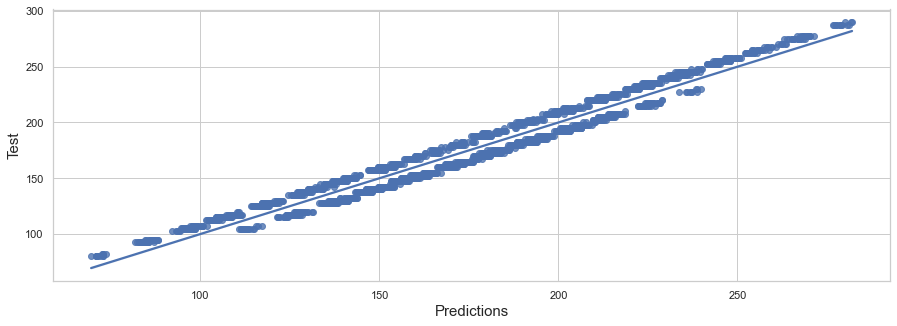


Printing model coefficients and intercept summary for sklearn model:
 [['Population' '4.1368811425774695e-06']
 ['Age' '0.007600546982491957']
 ['Income' '5.369511464088153e-06']
 ['Contacts' '-0.06297906277853785']
 ['Yearly_equip_failure' '-0.08331262606785342']
 ['Tenure' '0.03029923527958175']
 ['Gender_Male' '-0.2274950394091089']
 ['Gender_Nonbinary' '-0.9224255269022077']
 ['Contract_One year' '0.8445414143503365']
 ['Contract_Two Year' '0.6969551933390342']
 ['Port_modem_Yes' '-0.37064523710887526']
 ['Tablet_Yes' '-0.3563658056062679']
 ['InternetService_Fiber Optic' '20.052429734022887']
 ['InternetService_None' '-12.839046600298305']
 ['Phone_Yes' '-0.3795145489603682']
 ['Multiple_Yes' '31.96964932288477']
 ['OnlineSecurity_Yes' '2.7532843974800345']
 ['OnlineBackup_Yes' '22.576788345457032']
 ['DeviceProtection_Yes' '12.262565582301452']
 ['TechSupport_Yes' '12.6660092729402']
 ['StreamingTV_Yes' '41.41714440466709']
 ['StreamingMovies_Yes' '51.41885183650077']
 ['Paperle

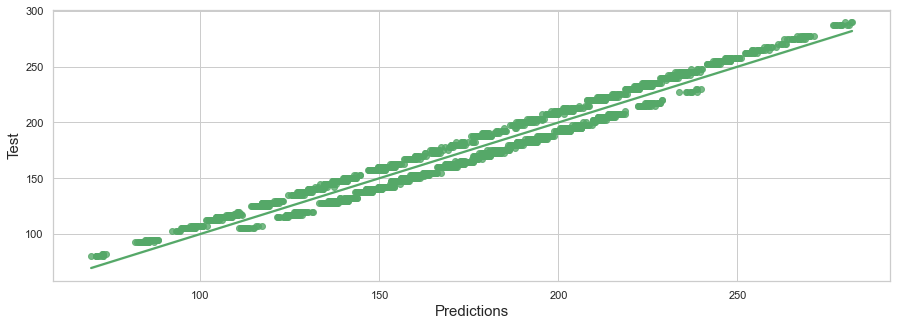

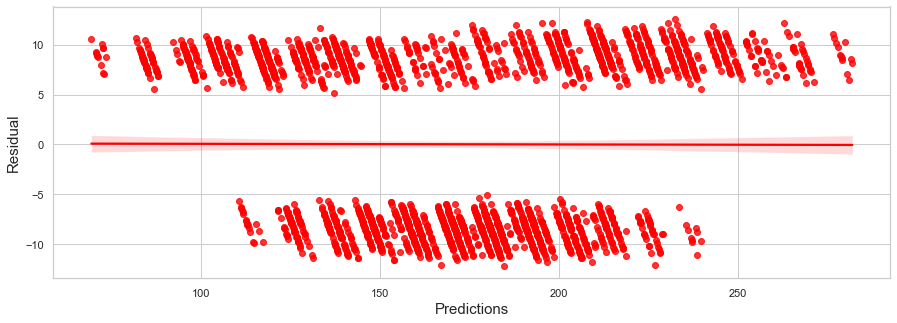

(10000, 7)

In [96]:
data_reduced = df[['Churn','Population', 'Age', 'Income', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'Gender',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharge']]

dummy_variables = ['Gender',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

to_transform = ['Population', 'Age', 'Income', 'Contacts',
       'Yearly_equip_failure','Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Then, we will drop the variable Yearly_equip_failure.

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     7088.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:07   Log-Likelihood:                -25075.
No. Observations:                7000   AIC:                         5.020e+04
Df Residuals:                    6976   BIC:                         5.036e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

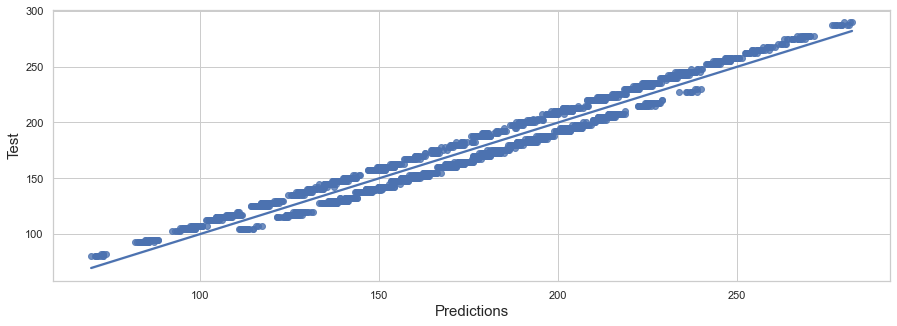


Printing model coefficients and intercept summary for sklearn model:
 [['Population' '4.185910290288548e-06']
 ['Age' '0.007576378235083337']
 ['Income' '5.382096970581677e-06']
 ['Contacts' '-0.06309845132505079']
 ['Tenure' '0.03029398638155943']
 ['Gender_Male' '-0.22796786968768928']
 ['Gender_Nonbinary' '-0.9329914069413784']
 ['Contract_One year' '0.8428586130817147']
 ['Contract_Two Year' '0.6975392977293281']
 ['Port_modem_Yes' '-0.3704076562780884']
 ['Tablet_Yes' '-0.3558265356305159']
 ['InternetService_Fiber Optic' '20.053590664424526']
 ['InternetService_None' '-12.838149373066532']
 ['Phone_Yes' '-0.3771858740660055']
 ['Multiple_Yes' '31.969276916692987']
 ['OnlineSecurity_Yes' '2.755545934351']
 ['OnlineBackup_Yes' '22.576521015262713']
 ['DeviceProtection_Yes' '12.263555745244203']
 ['TechSupport_Yes' '12.665393958121616']
 ['StreamingTV_Yes' '41.4157985193604']
 ['StreamingMovies_Yes' '51.41814489823245']
 ['PaperlessBilling_Yes' '0.27912698592748214']
 ['Churn_1' '3

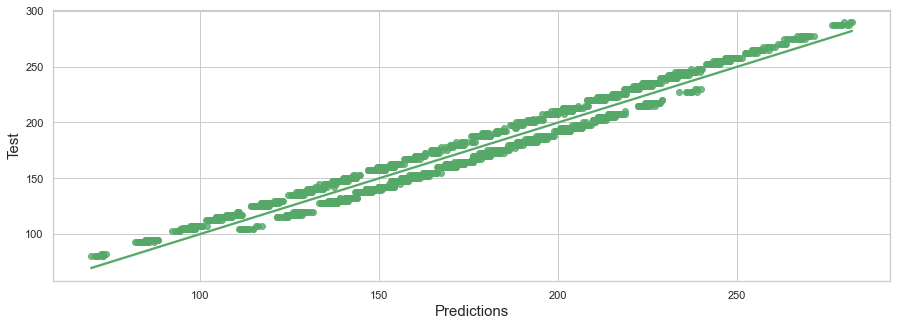

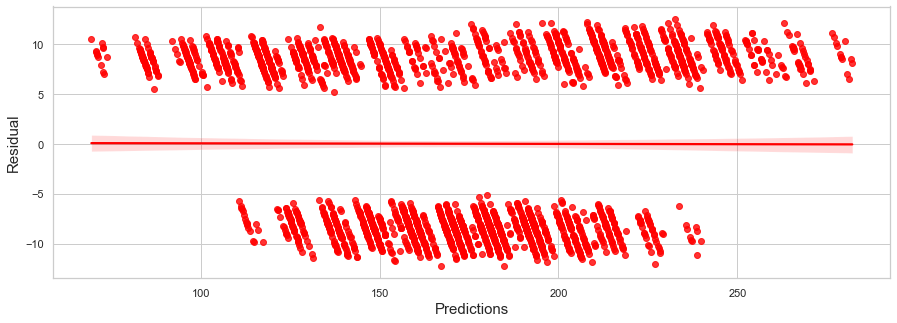

(10000, 7)

In [97]:
data_reduced = df[['Churn','Population', 'Age', 'Income', 'Contacts','Tenure', 'Gender',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharge']]

dummy_variables = ['Gender',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

to_transform = ['Population', 'Age', 'Income', 'Contacts',
                'Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Next, we will drop Population

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     7410.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:09   Log-Likelihood:                -25075.
No. Observations:                7000   AIC:                         5.020e+04
Df Residuals:                    6977   BIC:                         5.035e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

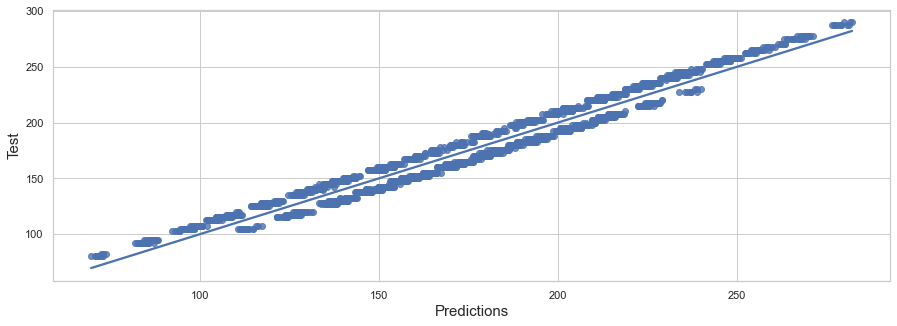


Printing model coefficients and intercept summary for sklearn model:
 [['Age' '0.007595762259979172']
 ['Income' '5.374761549594917e-06']
 ['Contacts' '-0.0623413681046219']
 ['Tenure' '0.030239023311129216']
 ['Gender_Male' '-0.22763953904542364']
 ['Gender_Nonbinary' '-0.9345021842714623']
 ['Contract_One year' '0.8404136078502008']
 ['Contract_Two Year' '0.6990478092992923']
 ['Port_modem_Yes' '-0.3677774368718928']
 ['Tablet_Yes' '-0.35491490942291737']
 ['InternetService_Fiber Optic' '20.05258325882343']
 ['InternetService_None' '-12.839699202327466']
 ['Phone_Yes' '-0.3754870592792668']
 ['Multiple_Yes' '31.968027093341025']
 ['OnlineSecurity_Yes' '2.756941221003556']
 ['OnlineBackup_Yes' '22.57872236856177']
 ['DeviceProtection_Yes' '12.263496525288183']
 ['TechSupport_Yes' '12.663866976825055']
 ['StreamingTV_Yes' '41.41619100555802']
 ['StreamingMovies_Yes' '51.4177825189015']
 ['PaperlessBilling_Yes' '0.28016117748455655']
 ['Churn_1' '3.6443668335919086']] 82.62331789250452

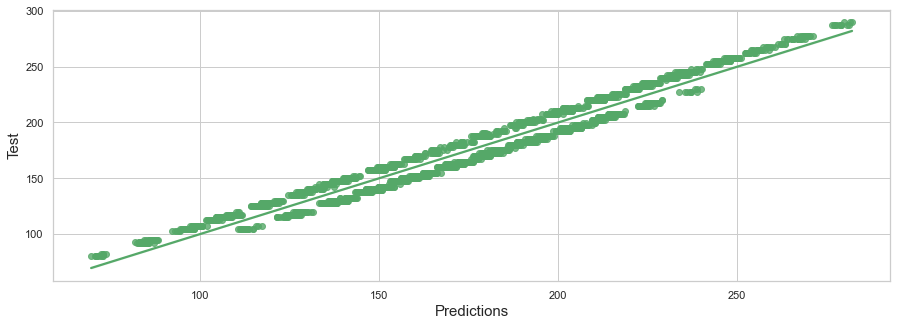

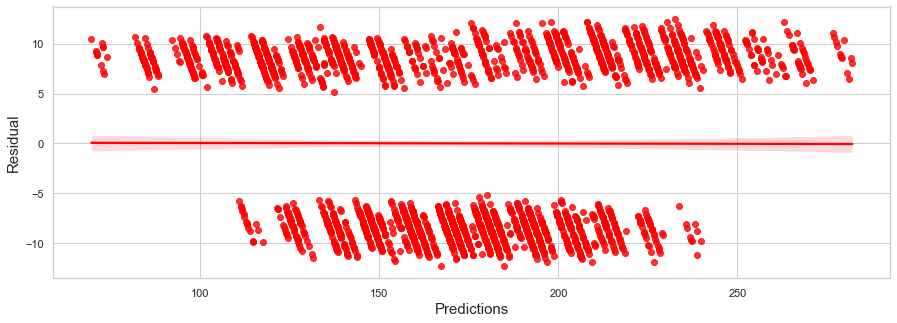

(10000, 7)

In [98]:
data_reduced = df[['Churn','Age', 'Income', 'Contacts','Tenure', 'Gender',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharge']]

dummy_variables = ['Gender',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

to_transform = ['Age', 'Income', 'Contacts',
                'Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Then, we will be dropping Contacts

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     7764.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:12   Log-Likelihood:                -25075.
No. Observations:                7000   AIC:                         5.019e+04
Df Residuals:                    6978   BIC:                         5.034e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

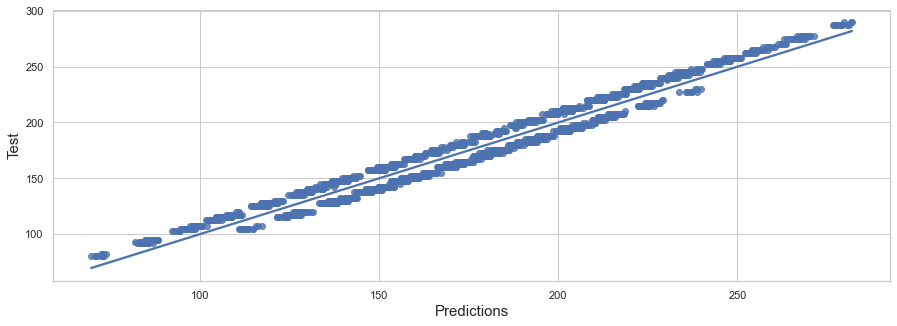


Printing model coefficients and intercept summary for sklearn model:
 [['Age' '0.007552628446954574']
 ['Income' '5.354747724649507e-06']
 ['Tenure' '0.030208720621593996']
 ['Gender_Male' '-0.2299435564533716']
 ['Gender_Nonbinary' '-0.9360509475079668']
 ['Contract_One year' '0.8407564427167712']
 ['Contract_Two Year' '0.698375364714833']
 ['Port_modem_Yes' '-0.3672143612854259']
 ['Tablet_Yes' '-0.3541626432180883']
 ['InternetService_Fiber Optic' '20.053417484528598']
 ['InternetService_None' '-12.838528705139897']
 ['Phone_Yes' '-0.3764775802321595']
 ['Multiple_Yes' '31.969033399513247']
 ['OnlineSecurity_Yes' '2.756161903963645']
 ['OnlineBackup_Yes' '22.577154578390818']
 ['DeviceProtection_Yes' '12.265304346591083']
 ['TechSupport_Yes' '12.66656495420398']
 ['StreamingTV_Yes' '41.416109329010816']
 ['StreamingMovies_Yes' '51.41679580350722']
 ['PaperlessBilling_Yes' '0.2789130230552914']
 ['Churn_1' '3.641026350396921']] 82.57081383391808

Printing predicted and actual values

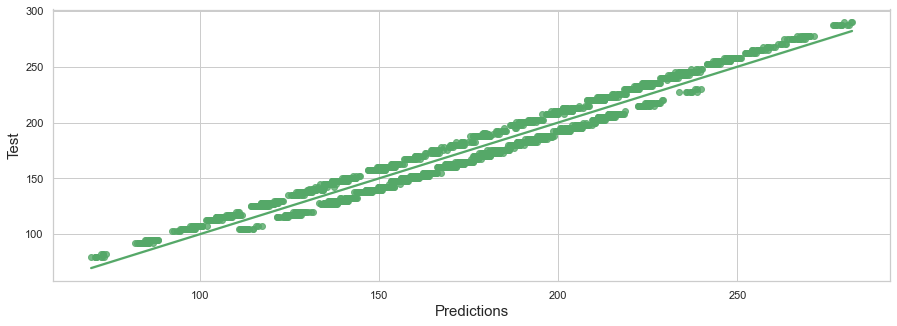

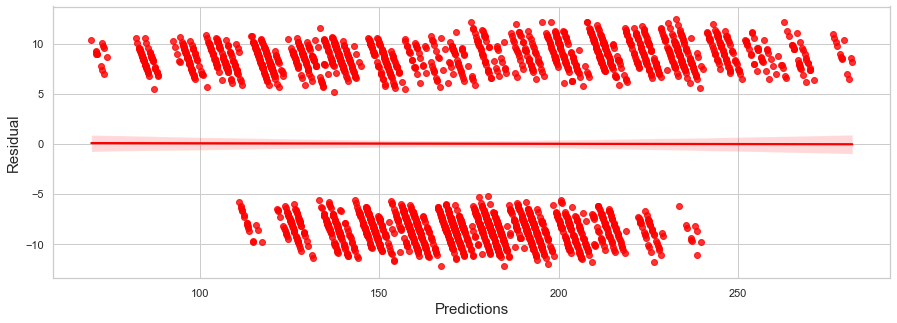

(10000, 7)

In [99]:
data_reduced = df[['Churn','Age', 'Income','Tenure', 'Gender',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharge']]

dummy_variables = ['Gender',
       'Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

to_transform = ['Age', 'Income', 
                'Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Then, we will drop Phone.

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     8152.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:15   Log-Likelihood:                -25076.
No. Observations:                7000   AIC:                         5.019e+04
Df Residuals:                    6979   BIC:                         5.034e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

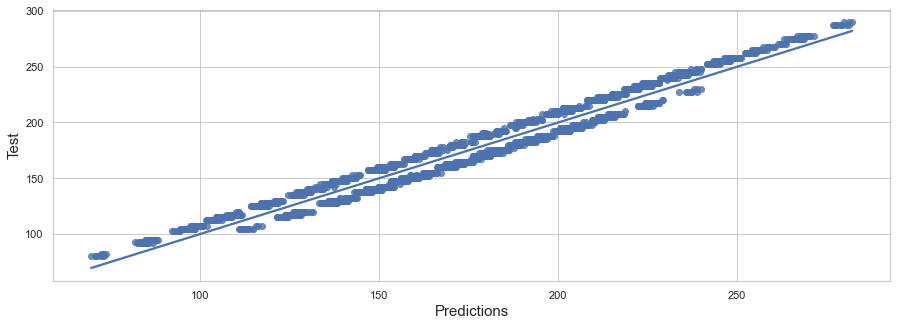


Printing model coefficients and intercept summary for sklearn model:
 [['Age' '0.007535485242951932']
 ['Income' '5.359879344653002e-06']
 ['Tenure' '0.03022569599403871']
 ['Gender_Male' '-0.2307754989583087']
 ['Gender_Nonbinary' '-0.9322822368312494']
 ['Contract_One year' '0.8404260098353938']
 ['Contract_Two Year' '0.6998766479605202']
 ['Port_modem_Yes' '-0.36758686530978213']
 ['Tablet_Yes' '-0.359663577691231']
 ['InternetService_Fiber Optic' '20.055764859845137']
 ['InternetService_None' '-12.841245731959035']
 ['Multiple_Yes' '31.967229489552253']
 ['OnlineSecurity_Yes' '2.7545097137546217']
 ['OnlineBackup_Yes' '22.577165087159305']
 ['DeviceProtection_Yes' '12.272922620130448']
 ['TechSupport_Yes' '12.66752398026499']
 ['StreamingTV_Yes' '41.41690937612153']
 ['StreamingMovies_Yes' '51.413673030762745']
 ['PaperlessBilling_Yes' '0.28022986922947773']
 ['Churn_1' '3.650180044561143']] 82.22536198286076

Printing predicted and actual values from sklearn:
 [[206.12659983 197.

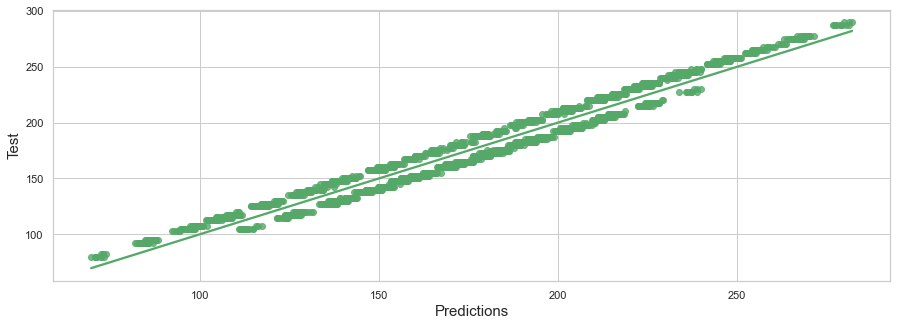

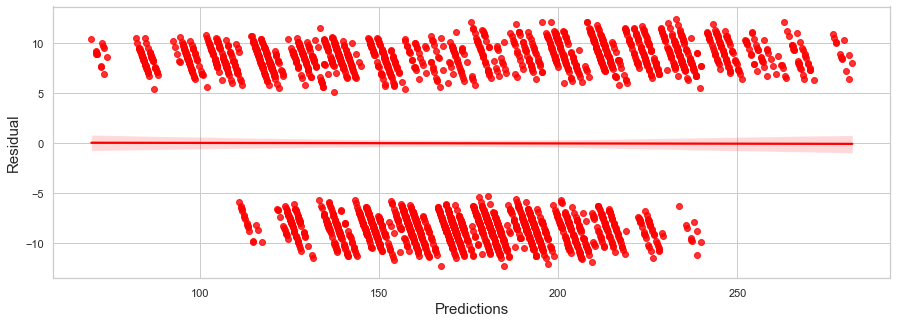

(10000, 7)

In [100]:
data_reduced = df[['Churn','Age', 'Income','Tenure', 'Gender',
       'Contract','Port_modem','Tablet','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharge']]

dummy_variables = ['Gender',
       'Contract','Port_modem','Tablet','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

to_transform = ['Age', 'Income', 
                'Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

We will now remove Gender from the dataset.

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     9057.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:17   Log-Likelihood:                -25077.
No. Observations:                7000   AIC:                         5.019e+04
Df Residuals:                    6981   BIC:                         5.032e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

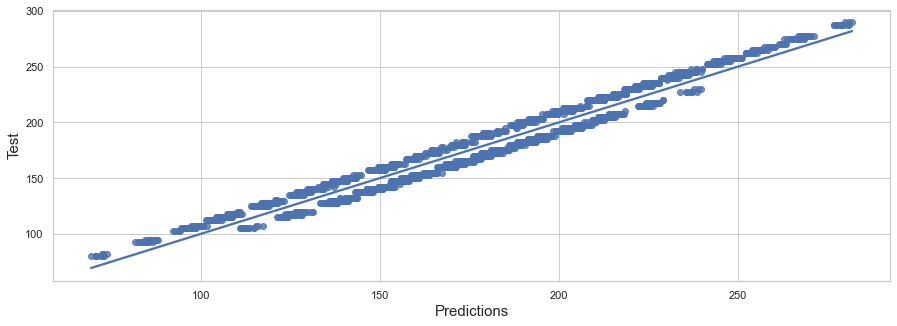


Printing model coefficients and intercept summary for sklearn model:
 [['Age' '0.007640821319229359']
 ['Income' '5.476164183533007e-06']
 ['Tenure' '0.03032850883210299']
 ['Contract_One year' '0.8390723882737828']
 ['Contract_Two Year' '0.6984352734451805']
 ['Port_modem_Yes' '-0.369723935387648']
 ['Tablet_Yes' '-0.3576695604624358']
 ['InternetService_Fiber Optic' '20.05535512244103']
 ['InternetService_None' '-12.840328167797457']
 ['Multiple_Yes' '31.970876563071666']
 ['OnlineSecurity_Yes' '2.752836094913673']
 ['OnlineBackup_Yes' '22.573950891752045']
 ['DeviceProtection_Yes' '12.276933886616384']
 ['TechSupport_Yes' '12.669444202655873']
 ['StreamingTV_Yes' '41.41449266218044']
 ['StreamingMovies_Yes' '51.41229795126273']
 ['PaperlessBilling_Yes' '0.28191155877982105']
 ['Churn_1' '3.64961593023207']] 82.08123771424896

Printing predicted and actual values from sklearn:
 [[206.0014007  197.4876    ]
 [135.30050973 144.960655  ]
 [192.43364827 200.1323    ]
 ...
 [210.08764033

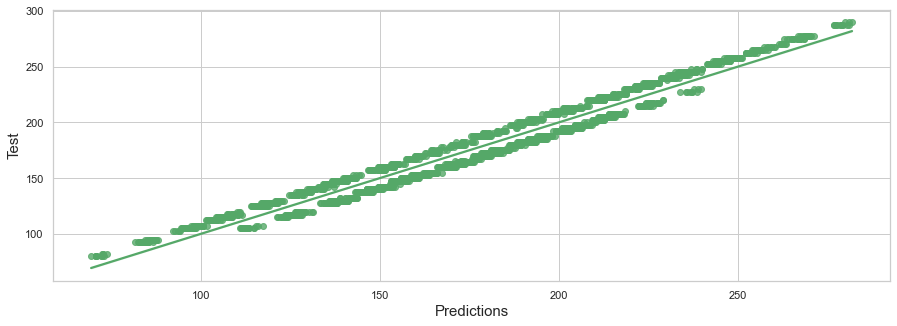

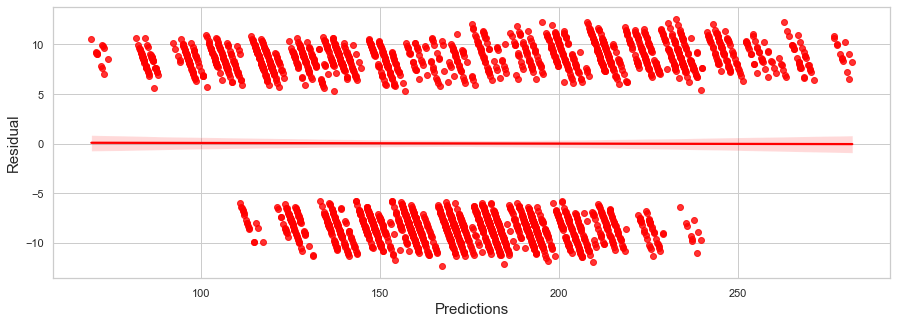

(10000, 7)

In [101]:
data_reduced = df[['Churn','Age', 'Income','Tenure',
       'Contract','Port_modem','Tablet','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharge']]

dummy_variables = ['Contract','Port_modem','Tablet','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

to_transform = ['Age', 'Income', 
                'Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Next, we will remove PaperlessBilling.

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     9589.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:19   Log-Likelihood:                -25078.
No. Observations:                7000   AIC:                         5.019e+04
Df Residuals:                    6982   BIC:                         5.031e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

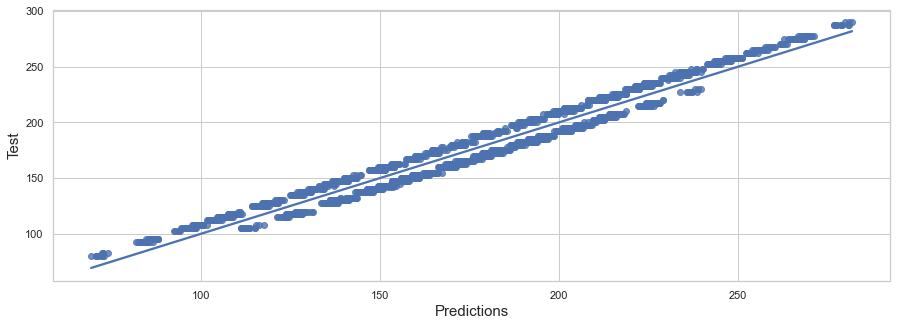


Printing model coefficients and intercept summary for sklearn model:
 [['Age' '0.0076408502159270655']
 ['Income' '5.388169109083341e-06']
 ['Tenure' '0.030415184824319815']
 ['Contract_One year' '0.8407882199806512']
 ['Contract_Two Year' '0.70681591352099']
 ['Port_modem_Yes' '-0.3653239675785239']
 ['Tablet_Yes' '-0.35273640904634945']
 ['InternetService_Fiber Optic' '20.06215777034781']
 ['InternetService_None' '-12.837844485873767']
 ['Multiple_Yes' '31.96874251212202']
 ['OnlineSecurity_Yes' '2.749224745003065']
 ['OnlineBackup_Yes' '22.573696211093285']
 ['DeviceProtection_Yes' '12.277086270625666']
 ['TechSupport_Yes' '12.668888888148178']
 ['StreamingTV_Yes' '41.40661984393817']
 ['StreamingMovies_Yes' '51.412548178131324']
 ['Churn_1' '3.6575532686407484']] 82.24267560202253

Printing predicted and actual values from sklearn:
 [[205.89444053 197.4876    ]
 [135.472454   144.960655  ]
 [192.32020813 200.1323    ]
 ...
 [210.26272795 202.4433    ]
 [193.07824757 184.9785    ]


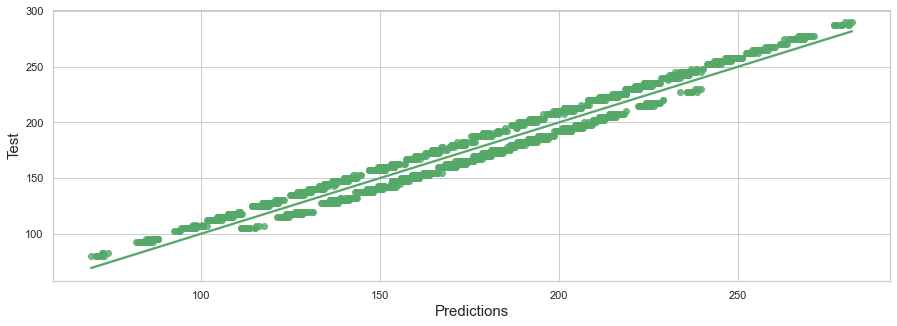

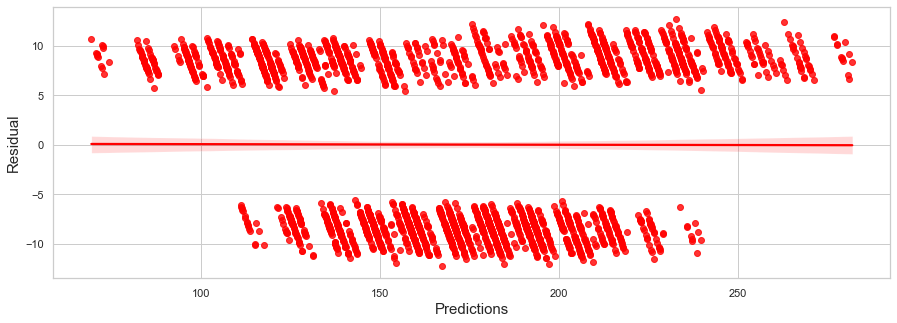

(10000, 7)

In [102]:
data_reduced = df[['Churn','Age', 'Income','Tenure',
       'Contract','Port_modem','Tablet','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','MonthlyCharge']]

dummy_variables = ['Contract','Port_modem','Tablet','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','Churn']

to_transform = ['Age', 'Income', 
                'Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Then, we will remove Income.

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.019e+04
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:23   Log-Likelihood:                -25079.
No. Observations:                7000   AIC:                         5.019e+04
Df Residuals:                    6983   BIC:                         5.031e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

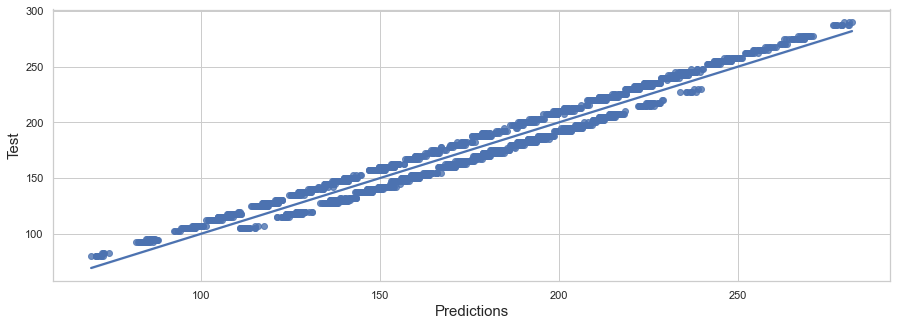


Printing model coefficients and intercept summary for sklearn model:
 [['Age' '0.007592492161661181']
 ['Tenure' '0.030439908052309228']
 ['Contract_One year' '0.8418714200923418']
 ['Contract_Two Year' '0.7092071572241597']
 ['Port_modem_Yes' '-0.36799851906871156']
 ['Tablet_Yes' '-0.3512697406254687']
 ['InternetService_Fiber Optic' '20.05180082252522']
 ['InternetService_None' '-12.844362858757686']
 ['Multiple_Yes' '31.969376224430516']
 ['OnlineSecurity_Yes' '2.7475794220981453']
 ['OnlineBackup_Yes' '22.571485817407485']
 ['DeviceProtection_Yes' '12.280523293341227']
 ['TechSupport_Yes' '12.671103239451954']
 ['StreamingTV_Yes' '41.407503904171605']
 ['StreamingMovies_Yes' '51.407792690536176']
 ['Churn_1' '3.6589485423590133']] 82.45587079466847

Printing predicted and actual values from sklearn:
 [[205.84133154 197.4876    ]
 [135.49663245 144.960655  ]
 [192.49867092 200.1323    ]
 ...
 [210.34971443 202.4433    ]
 [192.62789156 184.9785    ]
 [142.46146674 150.0208    ]]

P

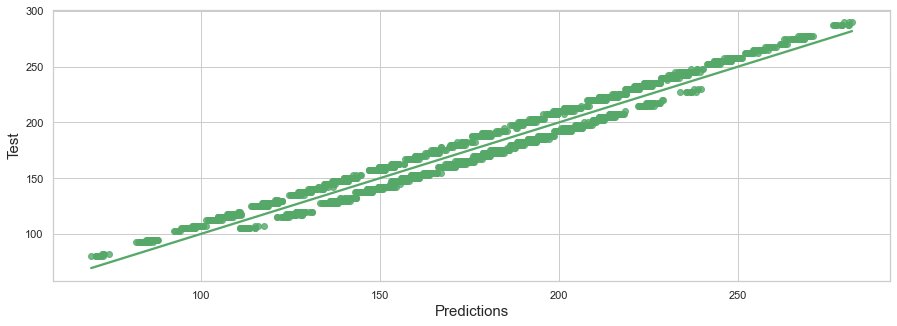

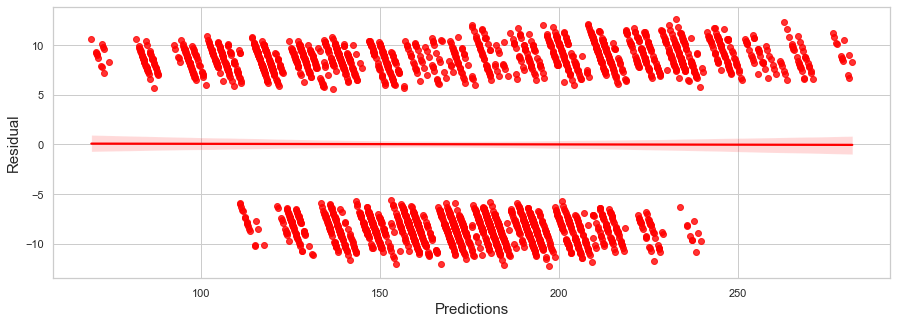

(10000, 7)

In [103]:
data_reduced = df[['Churn','Age','Tenure',
       'Contract','Port_modem','Tablet','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','MonthlyCharge']]

dummy_variables = ['Contract','Port_modem','Tablet','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','Churn']

to_transform = ['Age',
                'Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

We will drop the variable Tablet

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.086e+04
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:28   Log-Likelihood:                -25080.
No. Observations:                7000   AIC:                         5.019e+04
Df Residuals:                    6984   BIC:                         5.030e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

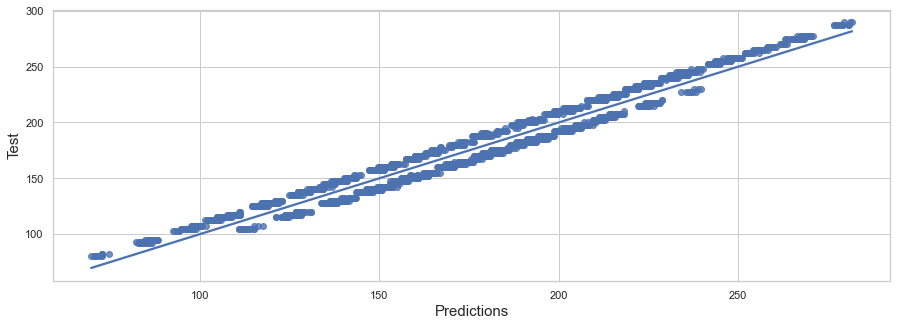


Printing model coefficients and intercept summary for sklearn model:
 [['Age' '0.00772670582669743']
 ['Tenure' '0.030529762014353645']
 ['Contract_One year' '0.8339022197198621']
 ['Contract_Two Year' '0.7112079949325746']
 ['Port_modem_Yes' '-0.3664903961687991']
 ['InternetService_Fiber Optic' '20.056383536544047']
 ['InternetService_None' '-12.841266541705293']
 ['Multiple_Yes' '31.974250230717523']
 ['OnlineSecurity_Yes' '2.741923764226666']
 ['OnlineBackup_Yes' '22.571822779905258']
 ['DeviceProtection_Yes' '12.281938796306994']
 ['TechSupport_Yes' '12.67260798992532']
 ['StreamingTV_Yes' '41.39572017355671']
 ['StreamingMovies_Yes' '51.39965279262262']
 ['Churn_1' '3.664639534563208']] 82.34429473109981

Printing predicted and actual values from sklearn:
 [[206.09018302 197.4876    ]
 [135.39988977 144.960655  ]
 [192.72921171 200.1323    ]
 ...
 [210.60037102 202.4433    ]
 [192.51909472 184.9785    ]
 [142.3721589  150.0208    ]]

Printing Mean Squared Error from sklearn:
 8.

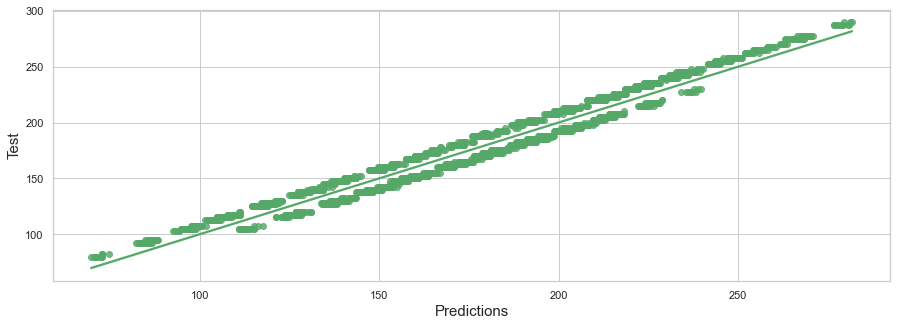

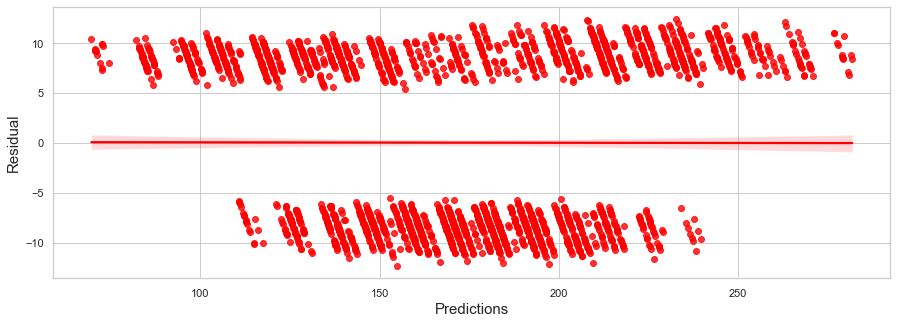

(10000, 7)

In [104]:
data_reduced = df[['Churn','Age','Tenure',
       'Contract','Port_modem','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','MonthlyCharge']]

dummy_variables = ['Contract','Port_modem','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','Churn']

to_transform = ['Age',
                'Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Now, we will drop Age.

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.164e+04
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:32   Log-Likelihood:                -25081.
No. Observations:                7000   AIC:                         5.019e+04
Df Residuals:                    6985   BIC:                         5.029e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

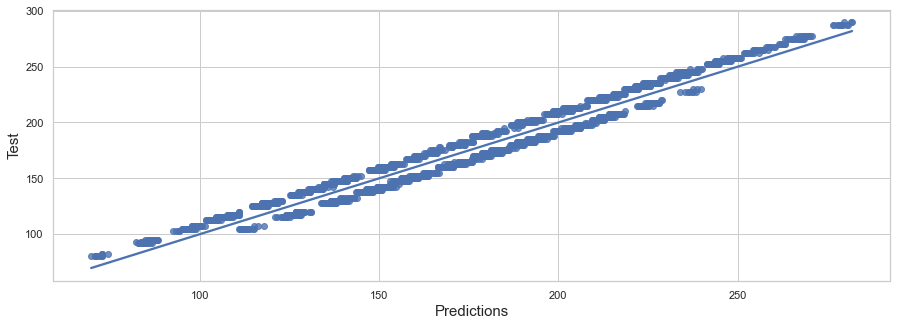


Printing model coefficients and intercept summary for sklearn model:
 [['Tenure' '0.03065947274082893']
 ['Contract_One year' '0.8312556137710789']
 ['Contract_Two Year' '0.7121992030067292']
 ['Port_modem_Yes' '-0.36228541999250613']
 ['InternetService_Fiber Optic' '20.056831370416617']
 ['InternetService_None' '-12.83832254021384']
 ['Multiple_Yes' '31.973086310553423']
 ['OnlineSecurity_Yes' '2.7360469940882646']
 ['OnlineBackup_Yes' '22.57153505843987']
 ['DeviceProtection_Yes' '12.285822078966312']
 ['TechSupport_Yes' '12.677854808128277']
 ['StreamingTV_Yes' '41.397664712477855']
 ['StreamingMovies_Yes' '51.406827455573556']
 ['Churn_1' '3.663606339687379']] 82.74385860446944

Printing predicted and actual values from sklearn:
 [[206.05687349 197.4876    ]
 [135.63035205 144.960655  ]
 [192.49749438 200.1323    ]
 ...
 [210.82945329 202.4433    ]
 [192.63191171 184.9785    ]
 [142.18572423 150.0208    ]]

Printing Mean Squared Error from sklearn:
 8.747182041542965

R2 Score  fr

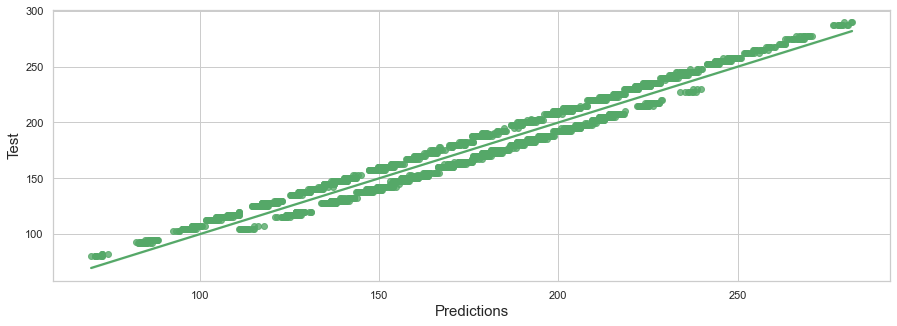

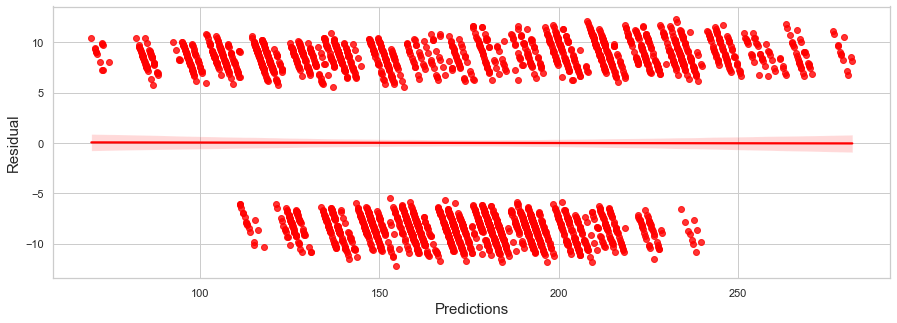

(10000, 7)

In [105]:
data_reduced = df[['Churn','Tenure',
       'Contract','Port_modem','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','MonthlyCharge']]

dummy_variables = ['Contract','Port_modem','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','Churn']

to_transform = ['Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Next, the variable to be removed is Port_modem

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.253e+04
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:37   Log-Likelihood:                -25082.
No. Observations:                7000   AIC:                         5.019e+04
Df Residuals:                    6986   BIC:                         5.029e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

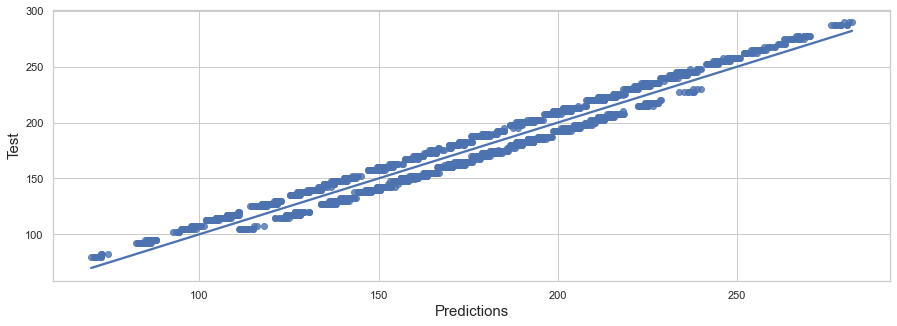


Printing model coefficients and intercept summary for sklearn model:
 [['Tenure' '0.030483508337386906']
 ['Contract_One year' '0.8313633358078514']
 ['Contract_Two Year' '0.7110804487097456']
 ['InternetService_Fiber Optic' '20.051230016233294']
 ['InternetService_None' '-12.83851528165117']
 ['Multiple_Yes' '31.979449908104268']
 ['OnlineSecurity_Yes' '2.7353770604161247']
 ['OnlineBackup_Yes' '22.578091367897102']
 ['DeviceProtection_Yes' '12.285592453980302']
 ['TechSupport_Yes' '12.674233463427312']
 ['StreamingTV_Yes' '41.39959115054416']
 ['StreamingMovies_Yes' '51.40616719332424']
 ['Churn_1' '3.65304481977446']] 82.57762910508451

Printing predicted and actual values from sklearn:
 [[206.23756673 197.4876    ]
 [135.46293741 144.960655  ]
 [192.32088079 200.1323    ]
 ...
 [210.65795971 202.4433    ]
 [192.82051418 184.9785    ]
 [142.01871635 150.0208    ]]

Printing Mean Squared Error from sklearn:
 8.745326797165129

R2 Score  from sklearn:
 0.958529347240067


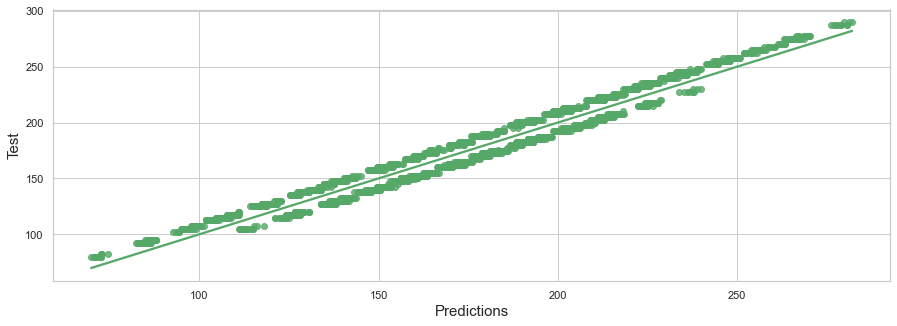

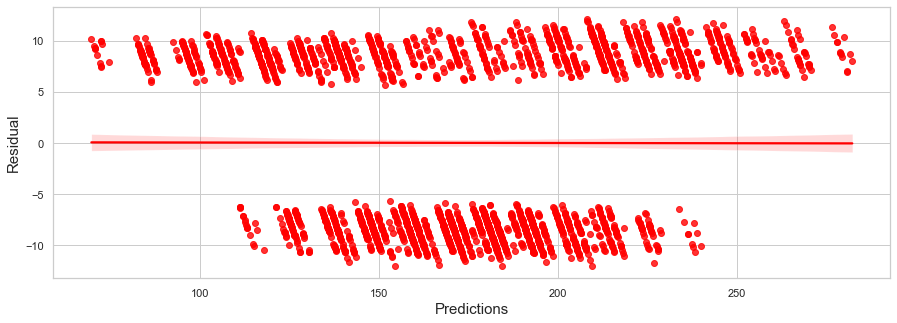

(10000, 7)

In [106]:
data_reduced = df[['Churn','Tenure',
       'Contract','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','MonthlyCharge']]

dummy_variables = ['Contract','InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','Churn']

to_transform = ['Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

Lastly, we will drop the last variable with p-value less than 0.05 which is Contract

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.478e+04
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:43   Log-Likelihood:                -25088.
No. Observations:                7000   AIC:                         5.020e+04
Df Residuals:                    6988   BIC:                         5.028e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

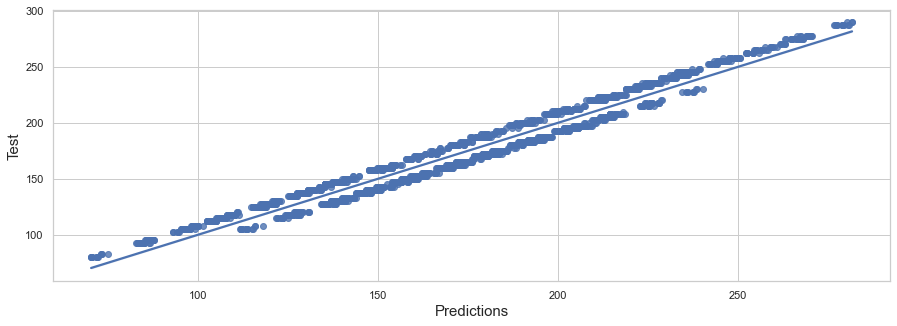


Printing model coefficients and intercept summary for sklearn model:
 [['Tenure' '0.027527769129168416']
 ['InternetService_Fiber Optic' '20.01800501623396']
 ['InternetService_None' '-12.882609565223733']
 ['Multiple_Yes' '32.046535750607774']
 ['OnlineSecurity_Yes' '2.74452402496772']
 ['OnlineBackup_Yes' '22.60390720914167']
 ['DeviceProtection_Yes' '12.297906709302104']
 ['TechSupport_Yes' '12.676363186497413']
 ['StreamingTV_Yes' '41.49658035382456']
 ['StreamingMovies_Yes' '51.501330089172335']
 ['Churn_1' '3.2620962487833727']] 83.00828430491836

Printing predicted and actual values from sklearn:
 [[206.59250322 197.4876    ]
 [135.20245432 144.960655  ]
 [191.71745002 200.1323    ]
 ...
 [211.04319013 202.4433    ]
 [193.24534611 184.9785    ]
 [141.61560442 150.0208    ]]

Printing Mean Squared Error from sklearn:
 8.769163966029824

R2 Score  from sklearn:
 0.9583029657192212


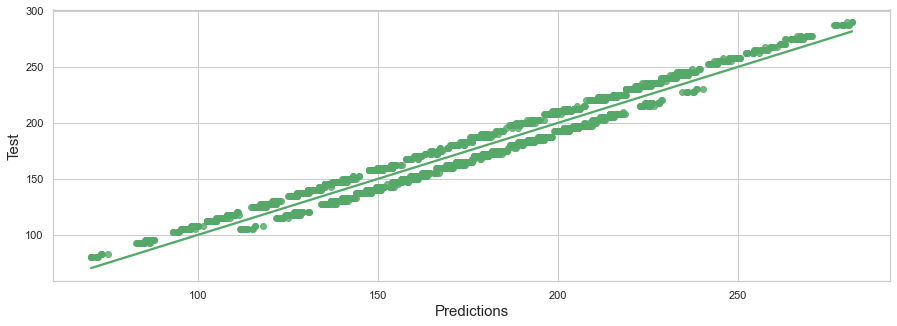

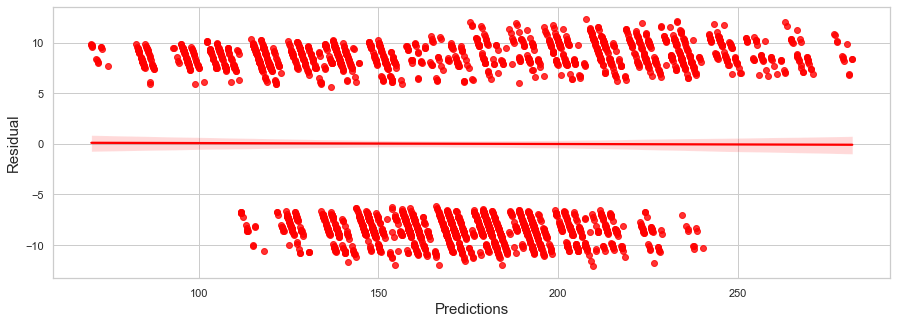

(10000, 7)

In [107]:
data_reduced = df[['Churn','Tenure',
       'InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','MonthlyCharge']]

dummy_variables = ['InternetService','Multiple',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
       'StreamingTV','StreamingMovies','Churn']

to_transform = ['Tenure','MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test)
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
X.shape

E1. Model comparison

To see if our model fits the data well, we can use the R squared. R squared measures the strength of the relationship between the model and the response variable(Frost). 

In this case, the R squared of the models are pretty close. In the initial model's is 0.97 while in the reduced model is 0.96. Despite this difference, we can still draw important conclusions with our model since we are inclding those variables statistically significant to MonthlyCharge. 

If we look at the residual plots, the initial model's one shows less difference between the predicted values and the true values. However, we can also see there are data points that are falling in the low side of the plot. This indicates we might be including a lot of noise to our model if we use all the variables we chose for the initial model.

On the other hand, the residual plot for the reduced model shows a bigger difference between the predicted and true values, but in this case the values are more consistent and there is less noise.

We can conclude that our reduced model fits the data well and it is more reliable since we are using only those predictor variables that are correlated to MonthlyCharge.

E2. Output and calculations

The calculations and output are all included in this Jupyter Notebook.

E3. Code

The code has been provided in this Jupyter Notebook.

F1. Results

A regression equation for the reduced model

The response variable is described as y, i.e., the MonthlyCharge (amount of dollars charged monthly). The predictor variables are the following: 'Churn','Tenure','InternetService','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',and 'StreamingMovies'.

The corresponding regression equation of the reduced model is shown below:

y = 0.028 x Tenure + 20.01 x InternetService_Fiber Optic - 12.88 x InternetService_None +32.05 x Multiple_Yes + 2.74 x OnlineSecurity_Yes + 22.6 x OnlineBackup_Yes + 12.30 x DeviceProtection_Yes + 12.68 x TechSupport_Yes + 41.50 x StreamingTV_Yes + 51.50 x StreamingMovies_Yes + 3.26 x Churn + 83.01


Interpretation of coefficients of the statistically significant variables of the model

In a linear regression, the sign of the coefficients refers to whether the variable has a positive or negative effect on the response variable. A positve coefficient means the if predictor variable increases the response variable also increases. On the contrary, a negative coefficient tells us if the independent variable increases the dependent variable will decrease (Frost). The value of the coefficient indicates how much the response variable changes if the predictor variable changes in one unit while keeping the rest of the independent variables the same.

In the case of Tenure, it has a positive effect on MonthlyCharge which means if Tenure increases by 1 unit, MonthlyCharge will increase in 0.028. 

For the categorical variables in the study, the regression coefficient represents the difference in the predicted values if the response variable between the categories (Yes and No). For example, customers that have the StreamingMovies service get charged 51.50 more than customers that don't have this service if we leave the rest of the independent variables as constants.

The statistical and practical significance of the model

Our reduced model uses those variabls that are statistically significant to the response variable. This ensures the model's significance overall.

On the other hand, practical significance refers to the magnitude of the difference or the effect size. In this case, we have a sample size of 10000 observations which would be considered good if the total population is 100000. If the population is 100000 or less then we can say our dataset is practically significant since it could be reproduced in the real world.

Limitations of the data analysis

Since a multiple regression is also linear, we would not be able to explain correlations between the predictor and response variables if they are not linear(Rheem,2017).

For models with more than 5 independen variables, there is a bigger chance that the variables are somehwat correlated resulting in a muticollinearity situation.

Another limitation for a multiple regression model is that we may mistake a correlation for a causation. For example, we can say that since there is a very strong correlation between StreamingTV and MonthlyCharge, customers with StreamingTV always have a larger bill. However, we can't make these kind of conclusions since there are more variables taken into account.

Finally, since we are only using the R squared and residual plots we might

F2. Recommendations

After the multiple regression analysis, we can recommend that if the company want to increase their revenue, we need to increase the MonthlyCharge. To do this, the company could invest or charge more in the services that contribute more to MonthlyCharge, StreamingTV and StreamingMovies. 

However, the company has to be careful since if they charge more and the service is not as expected, customers may want to churn.

G. Panopto video

H. Sources of third-party code

Sharma, A. (2021, May 2). Retrieved from Github: https://github.com/microbhai/CustomerChurnAnalysis/blob/master/MultipleLinearRegression/.ipynb_checkpoints/MultipleRegression-checkpoint.ipynb

Team, C. (2022, December 5). Variance Inflation Factor. Retrieved from Corporate Finance Institue: https://corporatefinanceinstitute.com/resources/data-science/variance-inflation-factor-vif/


I. Sources

Fein, E. C., Gilmour, J., Machin, T., & Hendry, a. L. (n.d.). Retrieved from University of Southern Queensland: https://usq.pressbooks.pub/statisticsforresearchstudents/

Frost, J. (n.d.). How To Interpret R-squared in Regression Analysis. Retrieved from Statistics By Jim: https://statisticsbyjim.com/regression/interpret-r-squared-regression/

Rheem, H. (2017, March 27). Medium. Retrieved from Limitations of the Multiple Regression Model: https://medium.com/humansystemsdata/limitations-of-the-multiple-regression-model-93e84619012e

Zach. (2019, June 15). How to Interpret Regression Coefficients. Retrieved from Statology: https://www.statology.org/how-to-interpret-regression-coefficients/#:~:text=Interpreting%20the%20Coefficient%20of%20a%20Categorical%20Predictor%20Variable,which%20the%20predictor%20variable%20%3D%201rs